In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install sklearn
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as sci_stats
import sklearn as sk
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
import statsmodels.tsa.arima.model as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
#importing data
vaccination_data = pd.read_csv("Covid19-vaccination.csv")

# 1. Data Cleaning

In [4]:
print("Shape of Vaccination DataFrame:",vaccination_data.shape)
vaccination_data.head()

Shape of Vaccination DataFrame: (63006, 16)


location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      NaN             NaN                     NaN   
1                      NaN             NaN                     NaN   
2                      NaN             NaN                     NaN   
3                      NaN             NaN                     NaN   
4                      NaN             NaN                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 NaN                             0.0   
1              1367.0                             NaN   
2              1367.0                             NaN   
3              1367.0                             NaN   
4              1367.0                             NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                            0.0                                  NaN   
1                            NaN                                  NaN   
2                            NaN                                  NaN   
3                            NaN                                  NaN   
4                            NaN                                  NaN   

   total_boosters_per_hundred  daily_vaccinations_per_million  \
0                         NaN                             NaN   
1                         NaN                            34.0   
2                         NaN                            34.0   
3                         NaN                            34.0   
4                         NaN                            34.0   

   daily_people_vaccinated  daily_people_vaccinated_per_hundred  
0                      NaN                                  NaN  
1                   1367.0                                0.003  
2                   1367.0                                0.003  
3                   1367.0                                0.003  
4                   1367.0                                0.003

In [5]:
#checking whether if we have any missing data in the dataframe
vaccination_data.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

Here, we have 27277 rows with no or NaN value in the total vaccinations column. We can drop those as the total vaccinations column is important for the model as it has to predict the people vaccinated for upcoming days.

In [6]:
vaccination_data = vaccination_data.drop(vaccination_data[vaccination_data.total_vaccinations.isna()].index)
vaccination_data.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       1879
people_fully_vaccinated                 4751
total_boosters                         29169
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

After dropping the NaN values in the total_vaccinations columns, the metrics for other columns which has NaN columns can be visualized from the table above.

**1.1. Imputing Boosters columns**

The total rows count is 35,729, when we look at the total_boosters & total_boosters_per_hundred columns 29,169 rows are NaN. There is heavy missing data for the two columns.<br>
All the country which are listed below has used booster doses, I believe other countries haven't still used the booster doses for their people. So, we can impute the NaN values like 0 for both columns.

In [7]:
index = vaccination_data[vaccination_data.total_boosters.isna()].index
check_df = vaccination_data.drop(index)
print('Countries which has used the booster doses:\n',pd.DataFrame(check_df.location.value_counts()).index.values)

Countries which has used the booster doses:
 ['Europe' 'High income' 'World' 'European Union' 'Germany' 'Austria'
 'North America' 'Canada' 'France' 'Lithuania' 'South America' 'Uruguay'
 'Luxembourg' 'Upper middle income' 'Asia' 'Israel' 'Turkey'
 'Dominican Republic' 'Czechia' 'Lower middle income' 'Cambodia' 'Chile'
 'United States' 'Thailand' 'Italy' 'Belgium' 'Greece' 'Malta'
 'United Arab Emirates' 'Ireland' 'Panama' 'Malaysia' 'United Kingdom'
 'Northern Ireland' 'England' 'Serbia' 'Oceania' 'Russia' 'Australia'
 'South Korea' 'Ecuador' 'Gibraltar' 'Peru' 'Scotland' 'Wales' 'Spain'
 'Singapore' 'El Salvador' 'Africa' 'Iceland' 'Poland' 'North Macedonia'
 'Tunisia' 'Cyprus' 'Azerbaijan' 'Albania' 'Bolivia' 'Brazil' 'Iran'
 'Palestine' 'Hungary' 'Northern Cyprus' 'Argentina' 'Paraguay'
 'Costa Rica' 'China' 'Maldives' 'Bermuda' 'Bulgaria']


In [8]:
vaccination_data.total_boosters.fillna(0, inplace=True)
vaccination_data.total_boosters_per_hundred.fillna(0, inplace=True)
print("Shape of Vaccination DataFrame:",vaccination_data.shape)
vaccination_data.isna().sum()

Shape of Vaccination DataFrame: (35729, 16)


location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                      1879
people_fully_vaccinated                4751
total_boosters                            0
daily_vaccinations_raw                 5806
daily_vaccinations                      235
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred          1879
people_fully_vaccinated_per_hundred    4751
total_boosters_per_hundred                0
daily_vaccinations_per_million          235
daily_people_vaccinated                 882
daily_people_vaccinated_per_hundred     882
dtype: int64

In [9]:
vaccination_data.head()

location iso_code        date  total_vaccinations  people_vaccinated  \
0   Afghanistan      AFG  2021-02-22                 0.0                0.0   
6   Afghanistan      AFG  2021-02-28              8200.0             8200.0   
22  Afghanistan      AFG  2021-03-16             54000.0            54000.0   
44  Afghanistan      AFG  2021-04-07            120000.0           120000.0   
59  Afghanistan      AFG  2021-04-22            240000.0           240000.0   

    people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                       NaN             0.0                     NaN   
6                       NaN             0.0                     NaN   
22                      NaN             0.0                     NaN   
44                      NaN             0.0                     NaN   
59                      NaN             0.0                     NaN   

    daily_vaccinations  total_vaccinations_per_hundred  \
0                  NaN                            0.00   
6               1367.0                            0.02   
22              2862.0                            0.14   
44              3000.0                            0.30   
59              8000.0                            0.60   

    people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                            0.00                                  NaN   
6                            0.02                                  NaN   
22                           0.14                                  NaN   
44                           0.30                                  NaN   
59                           0.60                                  NaN   

    total_boosters_per_hundred  daily_vaccinations_per_million  \
0                          0.0                             NaN   
6                          0.0                            34.0   
22                         0.0                            72.0   
44                         0.0                            75.0   
59                         0.0                           201.0   

    daily_people_vaccinated  daily_people_vaccinated_per_hundred  
0                       NaN                                  NaN  
6                    1367.0                                0.003  
22                   2862.0                                0.007  
44                   3000.0                                0.008  
59                   8000.0                                0.020

From the above data frame, we can observe that the total_vaccinations column and people_vaccinated columns seem to have similar values. Let us plot the correlation matrix and confirm the correlation.

In [10]:
check_vaccination_data = vaccination_data.drop(vaccination_data[vaccination_data.people_vaccinated.isna()].index)
check_vaccination_data.isna().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                3212
total_boosters                            0
daily_vaccinations_raw                 5365
daily_vaccinations                      215
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    3212
total_boosters_per_hundred                0
daily_vaccinations_per_million          215
daily_people_vaccinated                 232
daily_people_vaccinated_per_hundred     232
dtype: int64

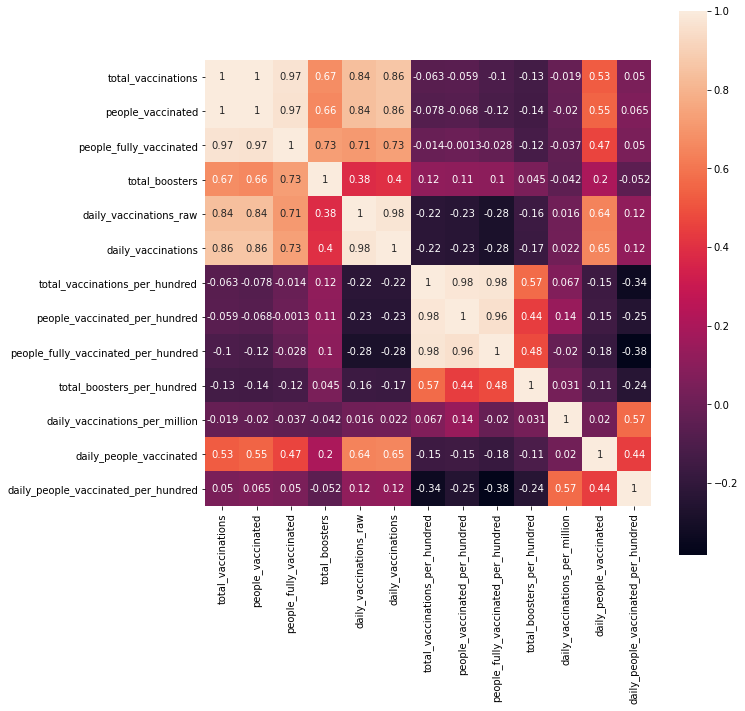

In [11]:
#correlation matrix
plt.subplots(figsize=(10,10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()

**From the above correlation plot these are correlated:**<br>
1. total_vaccinations & people_vaccinated
2. total_vaccinations & people_fully_vaccinated
3. daily_vaccinations_raw & daily_vaccinations
4. total_vaccinations_per_hundred & people_vaccinated_per_hundred
5. total_vaccinations_per_hundred & people_fully_vaccinated_per_hundred

**1.2. Checking whether total_vaccinations & people_vaccinated are really corelated?**<br>
- by checking distribution
- performing Mann-Whitney U test

**Why Mann-Whitney U Test?**<br>
Perform the Mann-Whitney U rank test on two independent samples.<br>

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of of difference in location between distributions.

In [12]:
index = vaccination_data[vaccination_data.people_vaccinated.isna()].index
check_df = vaccination_data.drop(index)

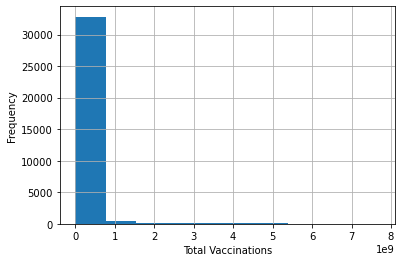

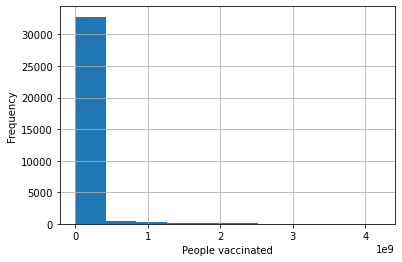

In [13]:
check_df.total_vaccinations.hist()
plt.xlabel('Total Vaccinations')
plt.ylabel('Frequency')
plt.show()

check_df.people_vaccinated.hist()
plt.xlabel('People vaccinated')
plt.ylabel('Frequency')
plt.show()

We can see that the distribution is not normally distributed, so we need to perform the Mann-Whitney U test to get the relation between two columns.

In [14]:
data1 = check_df.total_vaccinations
data2 = check_df.people_vaccinated

# compare samples
stat, p = sci_stats.mannwhitneyu(data1, data2, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=622015569.000, p=0.000
Different distribution (reject H0)


**Result:** total_vaccinations & people_vaccinated, seems to be corelated, but they are not really correlated as the t-test is less than 5 percentage. So we can fill the missing values of the people_vaccinated column with 0.

In [15]:
vaccination_data.people_vaccinated.fillna(0, inplace=True)
vaccination_data.isna().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                4751
total_boosters                            0
daily_vaccinations_raw                 5806
daily_vaccinations                      235
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred          1879
people_fully_vaccinated_per_hundred    4751
total_boosters_per_hundred                0
daily_vaccinations_per_million          235
daily_people_vaccinated                 882
daily_people_vaccinated_per_hundred     882
dtype: int64

**1.3. Checking whether total_vaccinations & people_fully_vaccinated are really corelated?**<br>
- by checking distribution
- performing t-test

In [16]:
index = vaccination_data[vaccination_data.people_fully_vaccinated.isna()].index
check_df = vaccination_data.drop(index)

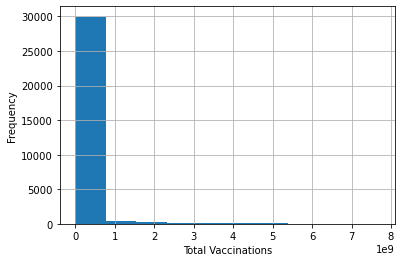

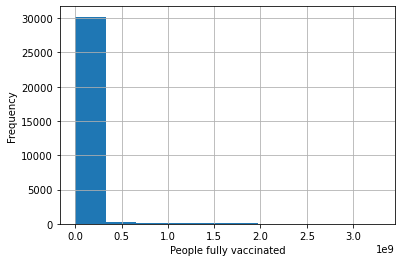

In [17]:
check_df.total_vaccinations.hist()
plt.xlabel('Total Vaccinations')
plt.ylabel('Frequency')
plt.show()

check_df.people_fully_vaccinated.hist()
plt.xlabel('People fully vaccinated')
plt.ylabel('Frequency')
plt.show()

We can see that the distribution is not normally distributed, so we need to perform the Mann-Whitney U test to get the relation between two columns.

In [18]:
data1 = check_df.total_vaccinations
data2 = check_df.people_fully_vaccinated
# compare samples
stat, p = sci_stats.mannwhitneyu(data1, data2, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=592928748.500, p=0.000
Different distribution (reject H0)


**Result:** total_vaccinations & people_fully_vaccinated, seems to be corelated, but they are not really correlated as the t-test is less than 5 percentage. So we can fill the missing values of the people_fully_vaccinated column with 0.

In [19]:
vaccination_data.people_fully_vaccinated.fillna(0, inplace=True)
vaccination_data.isna().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
total_boosters                            0
daily_vaccinations_raw                 5806
daily_vaccinations                      235
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred          1879
people_fully_vaccinated_per_hundred    4751
total_boosters_per_hundred                0
daily_vaccinations_per_million          235
daily_people_vaccinated                 882
daily_people_vaccinated_per_hundred     882
dtype: int64

**1.4. Checking whether daily_vaccinations_raw & daily_vaccinations are really corelated?**<br>
- by checking distribution
- performing t-test

In [20]:
index = vaccination_data[vaccination_data.daily_vaccinations_raw.isna()].index
check_df = vaccination_data.drop(index)
check_df.isna().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
total_boosters                            0
daily_vaccinations_raw                    0
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred          1438
people_fully_vaccinated_per_hundred    3385
total_boosters_per_hundred                0
daily_vaccinations_per_million            0
daily_people_vaccinated                 518
daily_people_vaccinated_per_hundred     518
dtype: int64

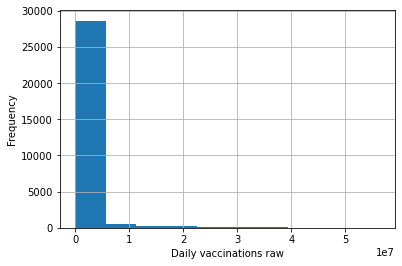

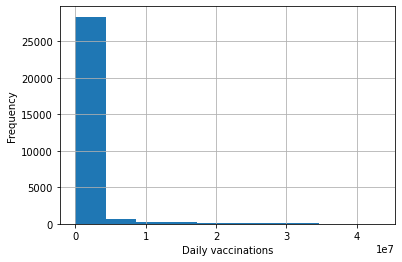

In [21]:
check_df.daily_vaccinations_raw.hist()
plt.xlabel('Daily vaccinations raw')
plt.ylabel('Frequency')
plt.show()

check_df.daily_vaccinations.hist()
plt.xlabel('Daily vaccinations')
plt.ylabel('Frequency')
plt.show()

We can see that the distribution is not normally distributed, so we need to perform the Mann-Whitney U test to get the relation between two columns.

In [22]:
data1 = check_df.daily_vaccinations_raw
data2 = check_df.daily_vaccinations

# compare samples
stat, p = sci_stats.mannwhitneyu(data1, data2, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=436662889.500, p=0.000
Different distribution (reject H0)


**Result:** daily_vaccinations_raw & daily_vaccinations, seems to be corelated, but they are not really correlated as the t-test is less than 5 percentage. So we can fill the missing values of the daily_vaccinations & daily_vaccinations_raw columns with 0.

In [23]:
vaccination_data.daily_vaccinations_raw.fillna(0, inplace=True)
vaccination_data.daily_vaccinations.fillna(0, inplace=True)
print("Shape of Vaccination DataFrame:",vaccination_data.shape)
vaccination_data.isna().sum()

Shape of Vaccination DataFrame: (35729, 16)


location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
total_boosters                            0
daily_vaccinations_raw                    0
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred          1879
people_fully_vaccinated_per_hundred    4751
total_boosters_per_hundred                0
daily_vaccinations_per_million          235
daily_people_vaccinated                 882
daily_people_vaccinated_per_hundred     882
dtype: int64

**1.5. Checking whether total_vaccinations_per_hundred & people_vaccinated_per_hundred are really corelated?**<br>
- by checking distribution
- performing t-test

In [24]:
index = vaccination_data[vaccination_data.people_vaccinated_per_hundred.isna()].index
check_df = vaccination_data.drop(index)
check_df.isna().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
total_boosters                            0
daily_vaccinations_raw                    0
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    3212
total_boosters_per_hundred                0
daily_vaccinations_per_million          215
daily_people_vaccinated                 232
daily_people_vaccinated_per_hundred     232
dtype: int64

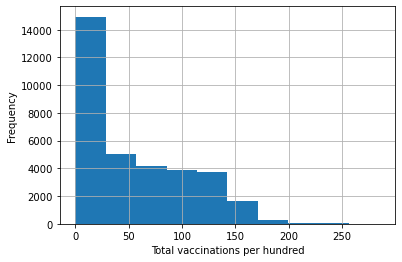

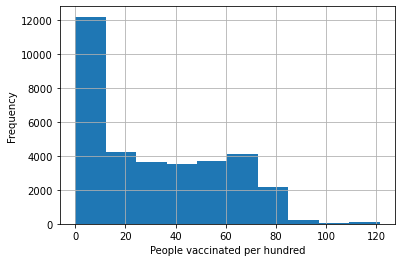

In [25]:
check_df.total_vaccinations_per_hundred.hist()
plt.xlabel('Total vaccinations per hundred')
plt.ylabel('Frequency')
plt.show()

check_df.people_vaccinated_per_hundred.hist()
plt.xlabel('People vaccinated per hundred')
plt.ylabel('Frequency')
plt.show()

In [26]:
data1 = check_df.total_vaccinations_per_hundred
data2 = check_df.people_vaccinated_per_hundred

# compare samples
stat, p = sci_stats.mannwhitneyu(data1, data2, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=693196150.500, p=0.000
Different distribution (reject H0)


**Result:** total_vaccinations_per_hundred & people_vaccinated_per_hundred, seems to be corelated, but they are not really correlated as the t-test is less than 5 percentage. So we can fill the missing values of the total_vaccinations_per_hundred & people_vaccinated_per_hundred columns with 0.

In [27]:
vaccination_data.people_vaccinated_per_hundred.fillna(0, inplace=True)
vaccination_data.isna().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
total_boosters                            0
daily_vaccinations_raw                    0
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    4751
total_boosters_per_hundred                0
daily_vaccinations_per_million          235
daily_people_vaccinated                 882
daily_people_vaccinated_per_hundred     882
dtype: int64

**1.6. Checking whether total_vaccinations_per_hundred & people_fully_vaccinated_per_hundred are really corelated?**<br>
- by checking distribution
- performing t-test

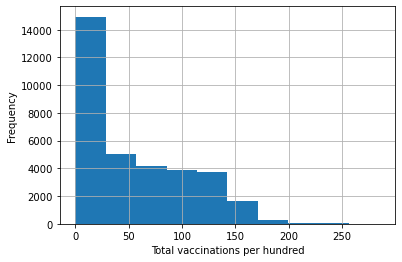

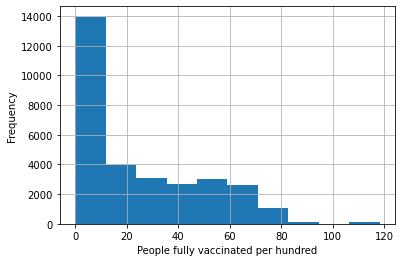

In [28]:
check_df.total_vaccinations_per_hundred.hist()
plt.xlabel('Total vaccinations per hundred')
plt.ylabel('Frequency')
plt.show()

check_df.people_fully_vaccinated_per_hundred.hist()
plt.xlabel('People fully vaccinated per hundred')
plt.ylabel('Frequency')
plt.show()

In [29]:
data1 = check_df.total_vaccinations_per_hundred
data2 = check_df.people_fully_vaccinated_per_hundred.fillna(0)

# compare samples
stat, p = sci_stats.mannwhitneyu(data1, data2, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=792256853.000, p=0.000
Different distribution (reject H0)


In [30]:
vaccination_data.people_fully_vaccinated_per_hundred.fillna(0, inplace=True)
vaccination_data.isna().sum()

location                                 0
iso_code                                 0
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                  0
total_boosters                           0
daily_vaccinations_raw                   0
daily_vaccinations                       0
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred      0
total_boosters_per_hundred               0
daily_vaccinations_per_million         235
daily_people_vaccinated                882
daily_people_vaccinated_per_hundred    882
dtype: int64

Let us fill all the remaning NaN values with 0 for remaning rows.

In [31]:
vaccination_data.daily_vaccinations_per_million.fillna(0, inplace=True)
vaccination_data.daily_people_vaccinated.fillna(0, inplace=True)
vaccination_data.daily_people_vaccinated_per_hundred.fillna(0, inplace=True)
vaccination_data.isna().sum()

location                               0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
total_boosters                         0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
daily_vaccinations_per_million         0
daily_people_vaccinated                0
daily_people_vaccinated_per_hundred    0
dtype: int64

# 2. Data Visualization and Exploratory Data Analysis

In [32]:
#Showing Country name without duplicates.
vaccination_data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

In [33]:
#ignoring the irrelavent locations
to_drop = ['World','Asia', 'High income', 'Low income', 'Lower middle income',
           'Upper middle income','Europe', 'North America', 'European Union',
           'South America','Africa' ]

We can see that some entries say World, Middle income, High-income location,... will be dropping those for data visualization sake.

**2.1. Getting the vaccination trend of top 5 countries in total vaccinations**

location  total_vaccinations
3           China        2.437252e+09
6           India        1.168057e+09
11  United States        4.514538e+08
12         Brazil        2.979605e+08
13      Indonesia        2.236386e+08

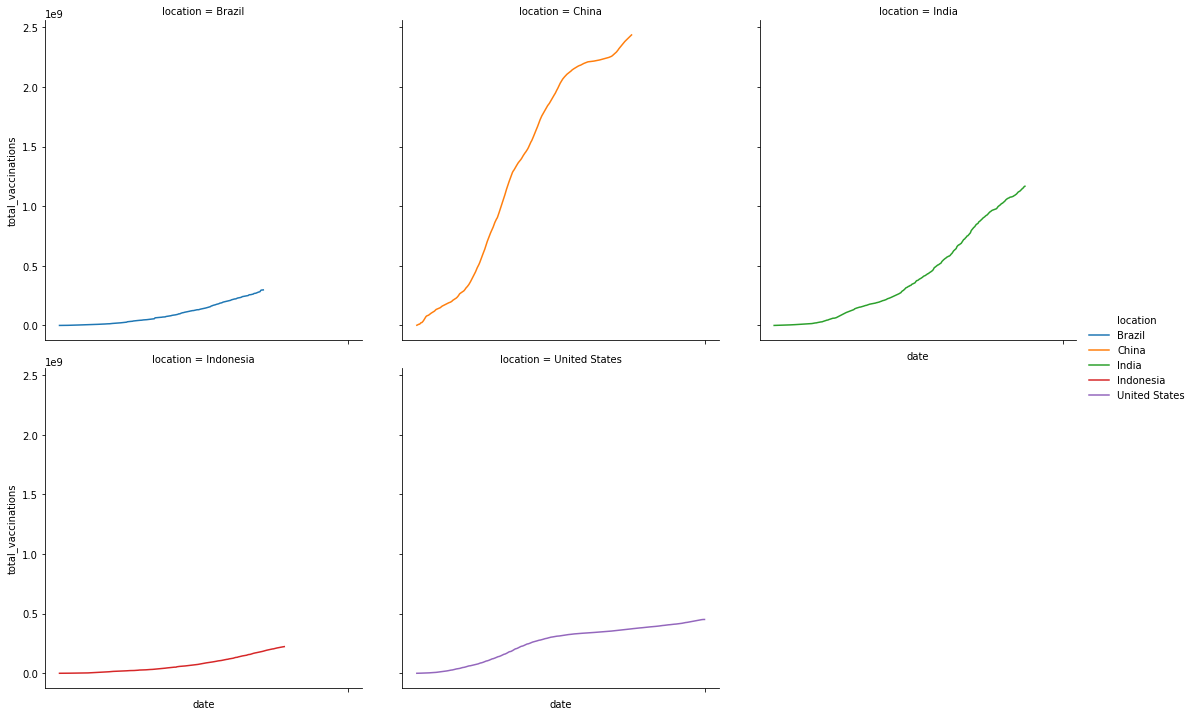

In [34]:
# Establishing which columns are relevant and preparing the dataset
cols = ['location', 'date', 'total_vaccinations']
covid_df = vaccination_data.reset_index()

top_vaccinations = vaccination_data.groupby('location').total_vaccinations.max().sort_values(ascending=False).reset_index()

for each in to_drop:
    top_vaccinations.drop(top_vaccinations[top_vaccinations.location == each].index, inplace=True)

display(top_vaccinations[0:5])
# Creating a list of the aforementioned best performing countries in terms of daily vaccinations
top_5_countries = top_vaccinations.location[0:5]

# Filtering and sorting the data
total_vacc_df = covid_df[['location', 'date', 'total_vaccinations']]
top_5_tv_df = total_vacc_df[total_vacc_df.location.isin(top_5_countries)]



# Plotting the data in a multi faceted lineplot
sns.relplot(data=top_5_tv_df, x='date', y='total_vaccinations', hue='location', col='location', kind='line', col_wrap=3)
plt.xticks('');

From the above vaccinations trend plot, we can observe that all the other countries apart from China has a gradual increase in the vaccination trend, but China has an exponential increase in the vaccination trend.

**2.2. Top 10 Countries with highest Partial Vaccinations count**

location  people_vaccinated
4           China       1.225000e+09
6           India       7.669880e+08
11  United States       2.302987e+08
12         Brazil       1.624368e+08
14      Indonesia       1.344183e+08
15          Japan       9.954649e+07
16       Pakistan       7.884517e+07
17         Mexico       7.586211e+07
18        Vietnam       6.670689e+07
19         Russia       6.349654e+07

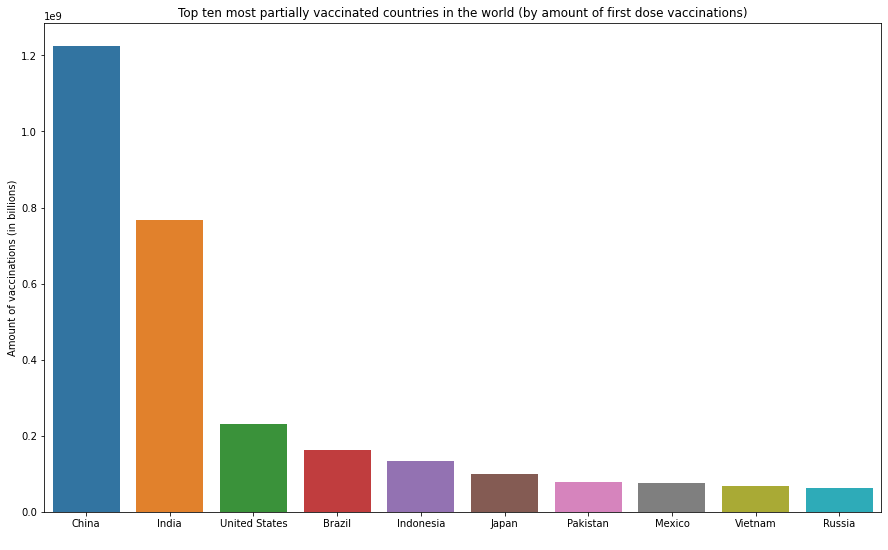

In [35]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_vaccinations = vaccination_data.groupby('location').people_vaccinated.max().sort_values(ascending=False).reset_index()

for each in to_drop:
  top_vaccinations.drop(top_vaccinations[top_vaccinations.location == each].index, inplace=True)

display(top_vaccinations[0:10])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('Top ten most partially vaccinated countries in the world (by amount of first dose vaccinations)')
sns.barplot(x=top_vaccinations.location[0:10], y=top_vaccinations['people_vaccinated'])
plt.xlabel(' ')
plt.ylabel('Amount of vaccinations (in billions)');

From the barplot, we can observe the top 10 partially vaccinated countries in the world. We can observe that there are more vaccinations administered in China and India compared to other countries the reason for that might be due to the high population in those locations.

**2.3. Top 10 Countries with highest count of fully vaccinations**

location  people_fully_vaccinated
3           China             1.076308e+09
7           India             4.010692e+08
11  United States             1.947970e+08
12         Brazil             1.284820e+08
13          Japan             9.648024e+07
15      Indonesia             8.922034e+07
16         Mexico             6.424975e+07
17        Germany             5.652882e+07
18         Russia             5.357812e+07
19         Turkey             5.003760e+07

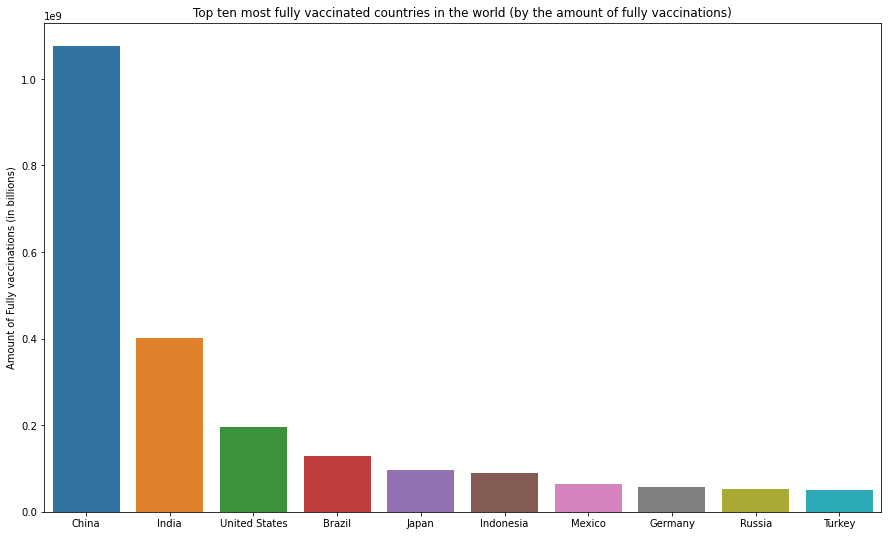

In [36]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_people_fully_vaccinated = vaccination_data.groupby('location').people_fully_vaccinated.max().sort_values(ascending=False).reset_index()

for each in to_drop:
  top_people_fully_vaccinated.drop(top_people_fully_vaccinated[top_people_fully_vaccinated.location == each].index, inplace=True)

display(top_people_fully_vaccinated[0:10])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('Top ten most fully vaccinated countries in the world (by the amount of fully vaccinations)')
sns.barplot(x=top_people_fully_vaccinated.location[0:10], y=top_people_fully_vaccinated['people_fully_vaccinated'])
plt.xlabel(' ')
plt.ylabel('Amount of Fully vaccinations (in billions)');

The above plot represents the order of the top 10 countries whose people are fully vaccinated. We can observe that China, India, and United States stood in the top 3 positions for fully vaccinations count.

**2.4. Top 10 countries which are using booster doses**

location  total_boosters
4            China      65730000.0
7    United States      35329604.0
10  United Kingdom      15064693.0
11          Turkey      13251975.0
12         England      12641727.0
13          Brazil      12107003.0
14           Chile       7888858.0
15         Germany       5792095.0
16          France       5063612.0
18          Israel       4047994.0

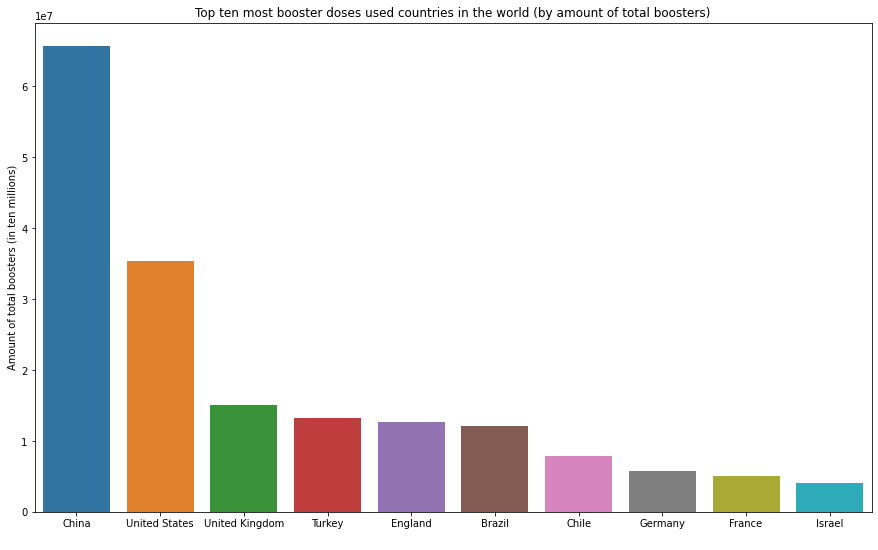

In [37]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_boosters = vaccination_data.groupby('location').total_boosters.max().sort_values(ascending=False).reset_index()

for each in to_drop:
  top_boosters.drop(top_boosters[top_boosters.location == each].index, inplace=True)

display(top_boosters[0:10])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('Top ten most booster doses used countries in the world (by amount of total boosters)')
sns.barplot(x=top_boosters.location[0:10], y=top_boosters['total_boosters'])
plt.xlabel(' ')
plt.ylabel('Amount of total boosters (in ten millions)');

From the above barplot, we get the information regarding the top 10 countries which has used more booster doses. We can see that China Stood first in both total vaccinations and booster doses count. India is not available in the top booster doses graph, this might be due to India has not administered booster doses to their people.

**2.5. Percentage of booster doses used in the top 10 countries compared with others**

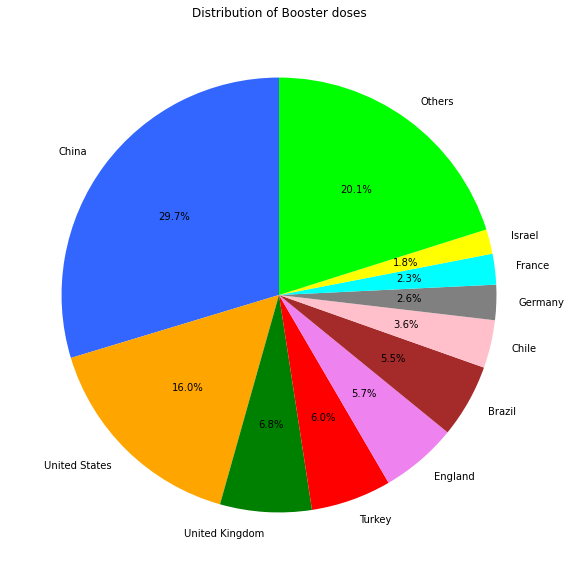

In [38]:
boosters = vaccination_data[['location','total_boosters']]
boosters.drop(boosters[boosters.total_boosters == 0].index,inplace=True)

for each in to_drop:
  boosters.drop(boosters[boosters.location == each].index, inplace=True)

boosters = boosters.groupby('location').total_boosters.max().sort_values(ascending=False).reset_index()

total_sum = boosters.total_boosters.sum()
weights = []

for each in boosters.values[:10]:
  weights.append(each[1]/total_sum)

rem = 1 - np.array(weights).sum()
weights.append(rem)

label = list(boosters.location.values[:10])
label.append('Others')
colors = ['#3366ff','orange','green','red','violet','brown','pink','grey','cyan','yellow','lime']

#creating pie-plot
fig = plt.figure(figsize =(10,10))
plt.pie(weights, labels=label, autopct='%1.1f%%', startangle=90,colors=colors)
plt.title('Distribution of Booster doses')
  
#show plot
plt.show()

From the above pie-plot, we can see that approximately 30 percent of booster doses around the world have been used in China and 16 percent of the world's booster doses have been used by the United States.

**2.6. Top 10 countries which has daily highest vaccination count.**

location  daily_vaccinations
3           China          22424286.0
5           India          10037995.0
11  United States           3499189.0
12         Brazil           2595170.0
14          Japan           1997542.0
15      Indonesia           1901294.0
16         Mexico           1648223.0
17        Vietnam           1632517.0
18     Bangladesh           1502924.0
19       Pakistan           1280906.0

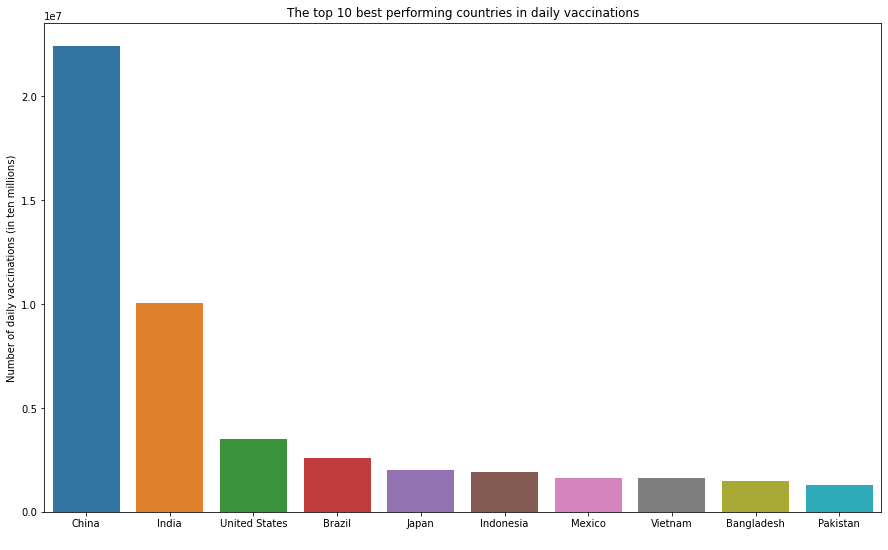

In [39]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_daily_vaccinations = vaccination_data.groupby('location').daily_vaccinations.max().sort_values(ascending=False).reset_index()

for each in to_drop:
  top_daily_vaccinations.drop(top_daily_vaccinations[top_daily_vaccinations.location == each].index, inplace=True)

display(top_daily_vaccinations[0:10])

plt.figure(figsize=(15, 9))
plt.title('The top 10 best performing countries in daily vaccinations')
sns.barplot(x=top_daily_vaccinations.location[0:10], y=top_daily_vaccinations.daily_vaccinations[0:10])
plt.xlabel(' ')
plt.ylabel('Number of daily vaccinations (in ten millions)');

From the above barplot, we can observe the top ten countries with the highest daily vaccinations. We can observe that China, India, and United States stood in the top 3. These top 3 positions are similar for total vaccinations too.

**2.7. Getting the trend of daily vaccinations over the time period for the top 10 countries from the above barplot.**

location        date  daily_vaccinations
2732   Bangladesh  2021-01-26                 0.0
2733   Bangladesh  2021-01-27                26.0
2734   Bangladesh  2021-01-28               284.0
2735   Bangladesh  2021-02-07              3059.0
2736   Bangladesh  2021-02-09             23351.0
...           ...         ...                 ...
34635     Vietnam  2021-11-15           1235938.0
34636     Vietnam  2021-11-16           1152559.0
34637     Vietnam  2021-11-17           1187572.0
34638     Vietnam  2021-11-19           1244506.0
34639     Vietnam  2021-11-20           1275794.0

[2466 rows x 3 columns]

<Figure size 720x1800 with 0 Axes>

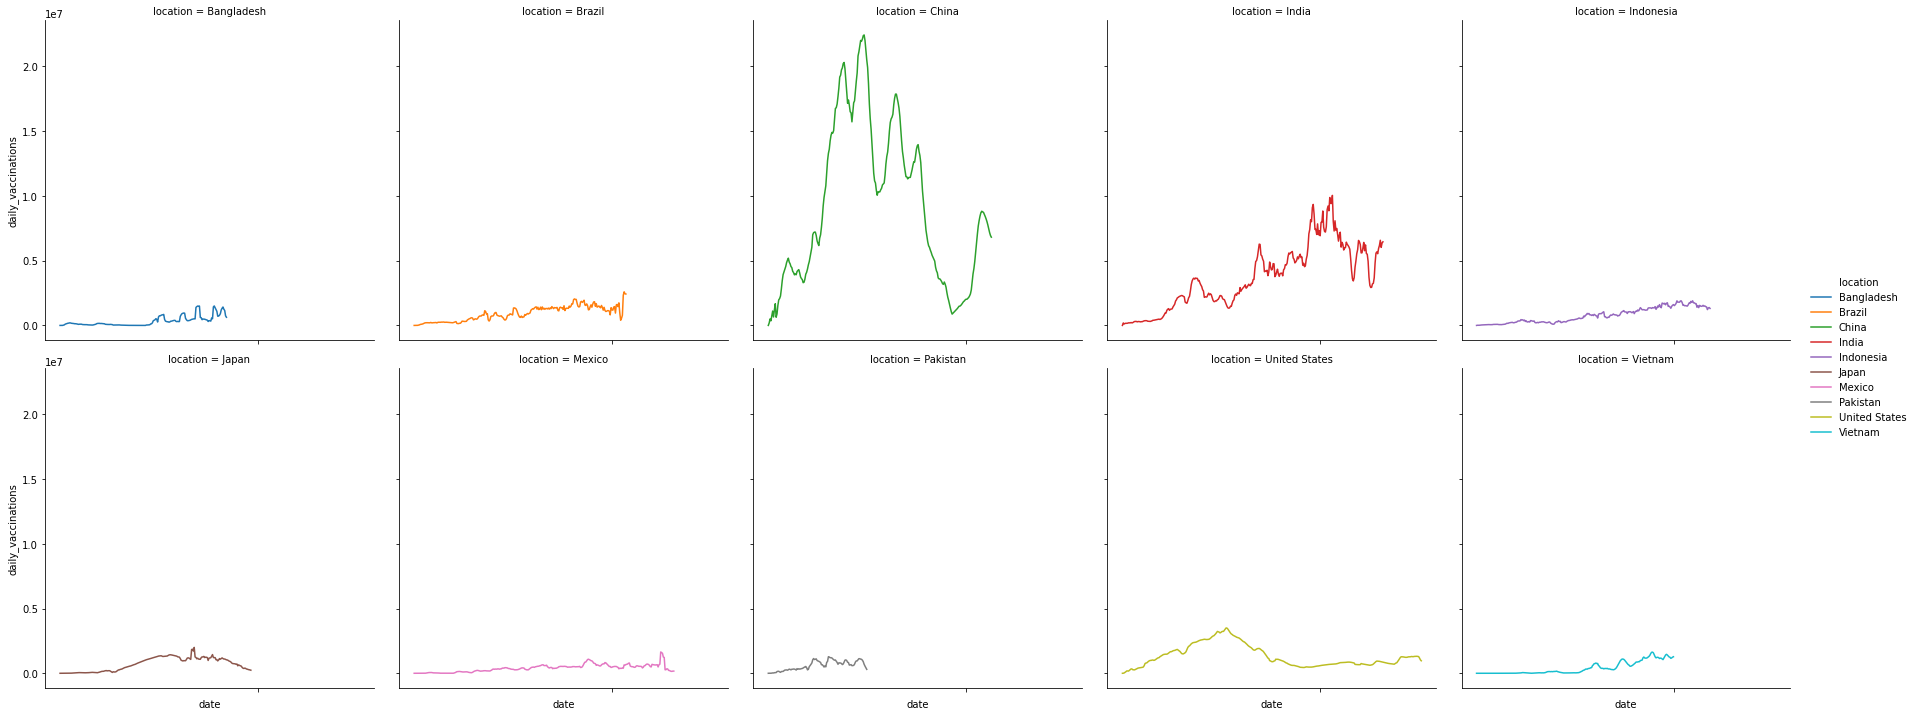

In [40]:
# Establishing which columns are relevant and preparing the dataset
cols = ['location', 'date', 'daily_vaccinations']
covid_df = vaccination_data.reset_index()

# Creating a list of the aforementioned best performing countries in terms of daily vaccinations
top_10_countries = [
    'China',
    'India',
    'United States',
    'Brazil',
    'Japan',
    'Indonesia',
    'Mexico',
    'Vietnam',
    'Bangladesh',
    'Pakistan'
]

# Filtering and sorting the data
daily_vacc_df = covid_df[['location', 'date', 'daily_vaccinations']]
top_10_dv_df = daily_vacc_df[daily_vacc_df.location.isin(top_10_countries)]

display(top_10_dv_df) # verifying that the filtering executed correctly

# Plotting the data in a multi faceted lineplot

plt.figure(figsize=(10, 25))
sns.relplot(data=top_10_dv_df, x='date', y='daily_vaccinations', hue='location', col='location', kind='line', col_wrap=5)
plt.xticks('');

From the above plot, we can observe that there is a significant increase in the daily vaccination in China and India compared to all the other countries. The performance of other countries is approximately 25 percent of china's daily vaccinations rate.

**2.8. Total Vaccinations trend compared with income level**

Text(0, 0.5, 'Number of total vaccinations(in billions)')

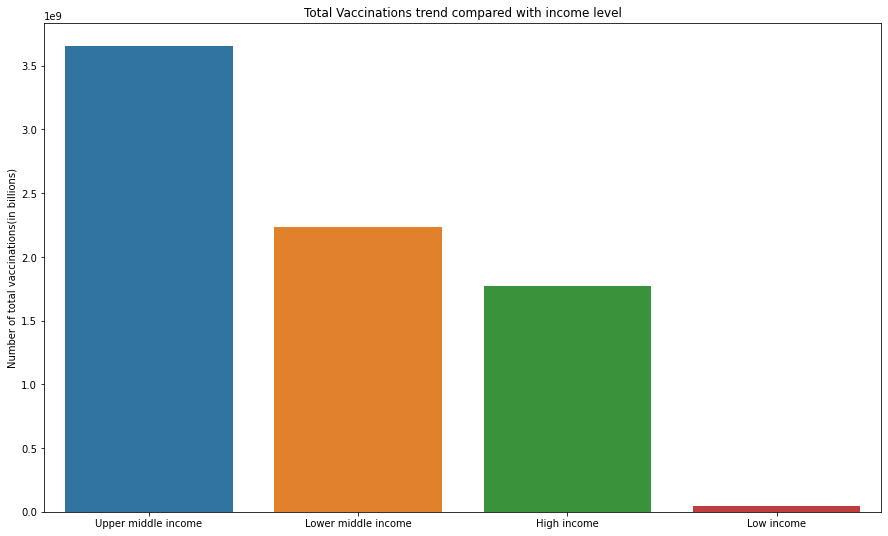

In [41]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
groups = ['Low income', 'High income', 'Lower middle income', 'Upper middle income']

buffer = vaccination_data.groupby('location').total_vaccinations.max().sort_values(ascending=False)
buffer = buffer[buffer.index.isin(groups)]

plt.figure(figsize=(15, 9))
plt.title('Total Vaccinations trend compared with income level')
sns.barplot(x=buffer.index, y=buffer)
plt.xlabel('')
plt.ylabel('Number of total vaccinations(in billions)')

From the above plot, we can observe that Upper Middle-income countries have a high total vaccinations count and lower-middle-income countries come in second-highest, this might be due to the large population in those countries. High-income country's total vaccinations count comes in the third position this might be due to low population density in those countries. Low-income countries come in the last, as these countries don't have valid resources to get people vaccinated.

# 3. Model selection and fitting to data

For covid-19 time series analysis, I am using the ARIMA model as it is simple and performs well compared to all the other time series models.

**3.1. Collecting country-specific data**<br>
Here I am selecting two countries to feed and perform predictions from ARIMA Model.<br>
1. Canada
2. United States

In [42]:
canada_vaccine_data = vaccination_data[vaccination_data.location == 'Canada'].reset_index()
canada_vaccine_data.drop('index', axis=1, inplace=True)
canada_vaccine_data.sort_values('total_vaccinations', inplace=True)
canada_vaccine_data.head()

location iso_code        date  total_vaccinations  people_vaccinated  \
0   Canada      CAN  2020-12-14                 5.0                5.0   
1   Canada      CAN  2020-12-15               727.0              727.0   
2   Canada      CAN  2020-12-16              3016.0             3016.0   
3   Canada      CAN  2020-12-17              7267.0             7267.0   
4   Canada      CAN  2020-12-18             11276.0            11276.0   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      0.0             0.0                     0.0   
1                      0.0             0.0                   722.0   
2                      0.0             0.0                  2289.0   
3                      0.0             0.0                  4251.0   
4                      0.0             0.0                  4009.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 0.0                            0.00   
1               722.0                            0.00   
2              1506.0                            0.01   
3              2421.0                            0.02   
4              2818.0                            0.03   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                           0.00                                  0.0   
1                           0.00                                  0.0   
2                           0.01                                  0.0   
3                           0.02                                  0.0   
4                           0.03                                  0.0   

   total_boosters_per_hundred  daily_vaccinations_per_million  \
0                         0.0                             0.0   
1                         0.0                            19.0   
2                         0.0                            40.0   
3                         0.0                            64.0   
4                         0.0                            74.0   

   daily_people_vaccinated  daily_people_vaccinated_per_hundred  
0                      0.0                                0.000  
1                    722.0                                0.002  
2                   1506.0                                0.004  
3                   2421.0                                0.006  
4                   2818.0                                0.007

In [43]:
us_vaccine_data = vaccination_data[vaccination_data.location == 'United States'].reset_index()
us_vaccine_data.drop('index', axis=1, inplace=True)
us_vaccine_data.sort_values('total_vaccinations', inplace=True)
us_vaccine_data.head()

location iso_code        date  total_vaccinations  people_vaccinated  \
0  United States      USA  2020-12-13             21800.0            18529.0   
1  United States      USA  2020-12-14             26124.0            22716.0   
2  United States      USA  2020-12-15             74833.0            69226.0   
3  United States      USA  2020-12-16            233645.0           222604.0   
4  United States      USA  2020-12-17            504183.0           486107.0   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                   3875.0             0.0                     0.0   
1                   3971.0             0.0                  4324.0   
2                   4166.0             0.0                 48709.0   
3                   4548.0             0.0                158812.0   
4                   5110.0             0.0                270538.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 0.0                            0.01   
1              4324.0                            0.01   
2             26516.0                            0.02   
3             70615.0                            0.07   
4            120596.0                            0.15   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                           0.01                                  0.0   
1                           0.01                                  0.0   
2                           0.02                                  0.0   
3                           0.07                                  0.0   
4                           0.14                                  0.0   

   total_boosters_per_hundred  daily_vaccinations_per_million  \
0                         0.0                             0.0   
1                         0.0                            13.0   
2                         0.0                            79.0   
3                         0.0                           210.0   
4                         0.0                           359.0   

   daily_people_vaccinated  daily_people_vaccinated_per_hundred  
0                      0.0                                0.000  
1                   4187.0                                0.001  
2                  25348.0                                0.008  
3                  68025.0                                0.020  
4                 116894.0                                0.035

Here, I am selecting Canada and United States to feed the model and make the forecast for the upcoming 50 days. We can observe that there are no missing rows or imputation of columns in the [date, people_vaccinated] columns.<br>
This is the best data to feed the model and make the predictions from them.

**3.2 Model Selection**

To find the forecast for the Vaccinations for the Canada and United states Vaccinations data, I am using the ARIMA Model as it is one of the best and simple models for the time series analysis.

**ARIMA stands for Autoregressive Integrated Moving Average:**<br>
**AR:** This part of the model uses the dependent relationship between an observation and some number of previous lagged observations.<br>
**I:** Making the time series data stationary by subtracting an observation from observation at the previous time step.<br>
**MA:** This part of the model uses the dependency between the observation and a residual error from the moving average model and applied to the lagged observations.<br><br>
Each one of these is specified in the model as a parameter. There is a standard notation being used as ARIMA(p, d, q), where we need to substitute the integer values to the parameters to indicate the specific ARIMA model being used.<br>

**The parameters of the ARIMA model are defined as**<br>
**p:** The order of the 'Auto Regressive' (AR) term is denoted by 'p.' It denotes the number of Y lags to be utilized as predictors.<br>
**d:** The number of differencing necessary to make the time series stationary is denoted by d.<br>
**q:** The order of the 'Moving Average' (MA) phrase is denoted by 'q.' It denotes the number of lag prediction errors that should be included in the ARIMA Model.<br>

**How to find p, d, q:**<br>
**p:** We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.<br>
**d:** We need to look at the count of differences, where the time series has become stationary.<br>
**q:** We can look at the ACF plot for the number of MA terms. The ACF tells how many MA terms are required to remove any autocorrelation in the stationaries series.
We need to look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate).<br>

If a time series exhibits seasonal trends, seasonal terms must be added, and the time series becomes SARIMA, short for Seasonal ARIMA.

**3.3. Finding the best p, d, q values for ARIMA model for Canada Vaccination Data**<br>
First, I am considering the Canada total vaccination data to find out the p, d, q values.

In [44]:
canada_values = canada_vaccine_data['total_vaccinations'].values

**Finding the best p for ARIMA model**<br>
From the below plot we can observe that two lags are going beyond the significance region/ critical range (blue colored range). So, we can say that the p-value is 2.<br>
**p = 2**

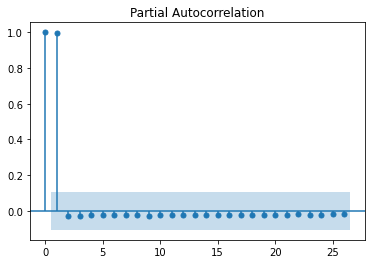

<Figure size 720x360 with 0 Axes>

In [45]:
plot_pacf(canada_values)
plt.figure(figsize=(10,5))
plt.show()

**Finding the best d & q value for ARIMA model**<br>
From the below plots, we can observe that for the second-order differencing we can observe the time series data has been stabilized i.e. no trend/ white noise.

**d = 2**

From the Autocorrelation plot, we can observe from the last autocorrelation plot that at lag = 3 it's entering the significance region/ critical zone(blue region).

**q = 3**

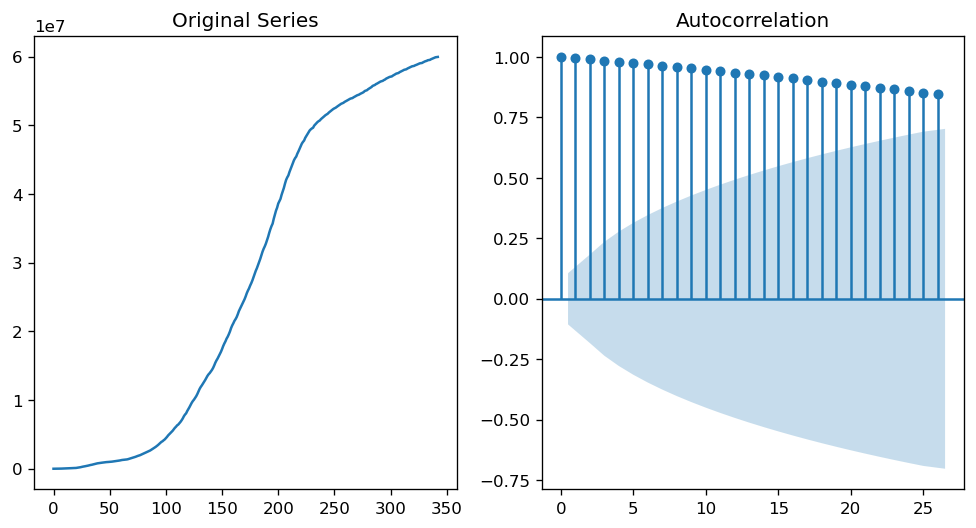

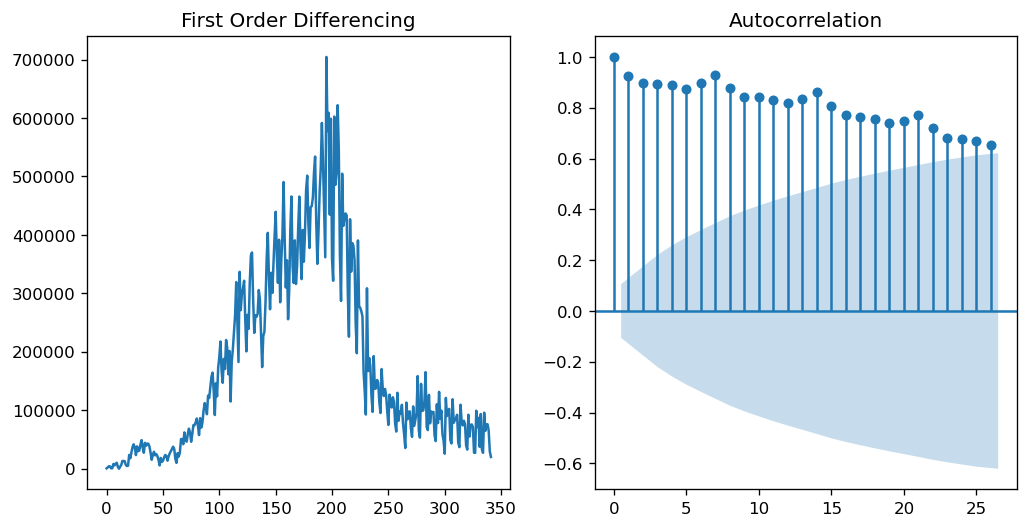

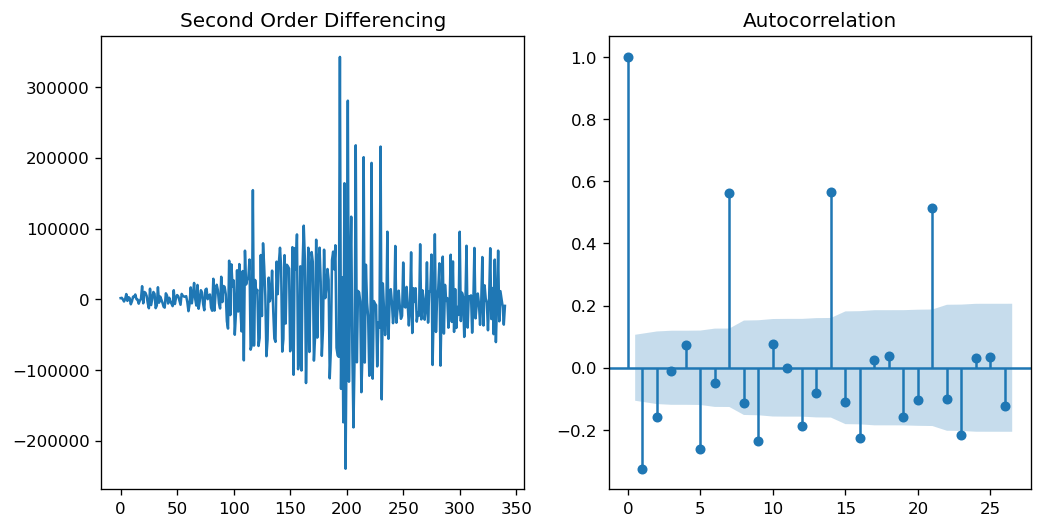

In [46]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})
# Original Series
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(canada_values); 
ax1.set_title('Original Series')
plot_acf(canada_values, ax=ax2)
plt.show()

# performing first order Differencing
first_diff = np.diff(canada_values)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(first_diff); 
ax1.set_title('First Order Differencing')
plot_acf(first_diff, ax=ax2)
plt.show()

# performing second order Differencing
second_diff = np.diff(first_diff)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(second_diff); 
ax1.set_title('Second Order Differencing')
plot_acf(second_diff, ax=ax2)
plt.show()

**Note:**<br>
So, the above steps are performed to find out the best values for the p,d,q else we can use the auto_arima function.<br>
auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC

**3.4. Creating ARIMA Model to forecast Canada Vaccination**

Let us plot the total vaccinations trend for Canada.

In [47]:
print('Number of days in Canada Vacination data:',len(canada_vaccine_data.date))
print('Number of months in Canada Vacination data:',len(canada_vaccine_data.date)/30)
print('Minimum Date:',canada_vaccine_data.date.min())
print('Maximum Date:',canada_vaccine_data.date.max())
print('Minimum Total Vaccination:',canada_vaccine_data.total_vaccinations.min())
print('Maximum Total Vaccination:',canada_vaccine_data.total_vaccinations.max())

Number of days in Canada Vacination data: 343
Number of months in Canada Vacination data: 11.433333333333334
Minimum Date: 2020-12-14
Maximum Date: 2021-11-21
Minimum Total Vaccination: 5.0
Maximum Total Vaccination: 59967851.0


In [48]:
canada_vaccine_data.total_vaccinations.max()

59967851.0

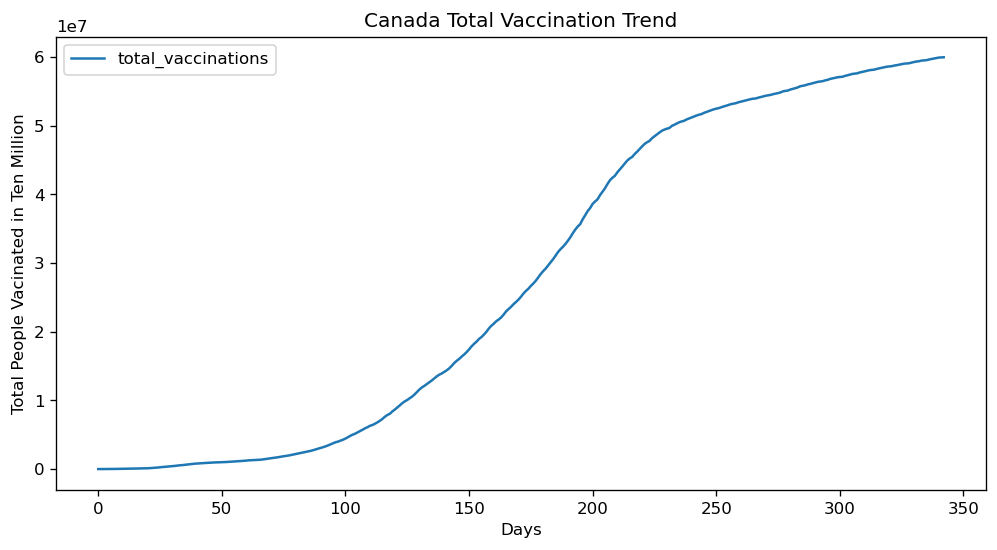

In [49]:
#plotting the total vaccinations trend for Canada location
canada_vaccine_data[['date', 'total_vaccinations']].plot(kind='line')
plt.xlabel('Days')
plt.ylabel('Total People Vacinated in Ten Million')
plt.title('Canada Total Vaccination Trend')
plt.show()

The above plot tells the people vaccinated trend between from 2020-12-14 to 2021-11-21 days. We can observe that there is an exponential increase in the total vaccinations.

Here, When I look at the data.<br>
Total Vaccinations = People Vaccinated with 1st dose + People Vaccinated with the 2nd dose.<br>

So, when we try to forecast the vaccinations, we need to consider the Total Vaccinations column as the People vaccinated column does not have the values of the count of people who are fully vaccinated on that day.<br>

Let us assume on a given day if people are only vaccinated with a second dose we miss may miss the vaccination stats for the specific country on that day.
And also we have many zero's in the people vaccinated column it's better to use the total people vaccinated column.

In [50]:
canada_values = canada_vaccine_data['total_vaccinations'].values

**Verifying the performance of model**<br>
Here, I am splitting the test set as 50 and remaining to train the model.<br>
**Why 50?:** In the forecast, we are trying to predict the vaccination forecast after 50 days. So Making a test-set of 50 entries will make the perfect evaluation for the model.<br>

For ARIMA model, I am using trend = 't' which indicates linear trend in time.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  293
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -3612.994
Date:                Wed, 15 Dec 2021   AIC                           7241.987
Time:                        17:46:35   BIC                           7271.429
Sample:                             0   HQIC                          7253.779
                                - 293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.768e+05   3.67e-08   4.81e+12      0.000    1.77e+05    1.77e+05
ar.L1          0.9960      0.043     23.405      0.000       0.913       1.079
ar.L2          0.9989      0.084     11.874      0.0

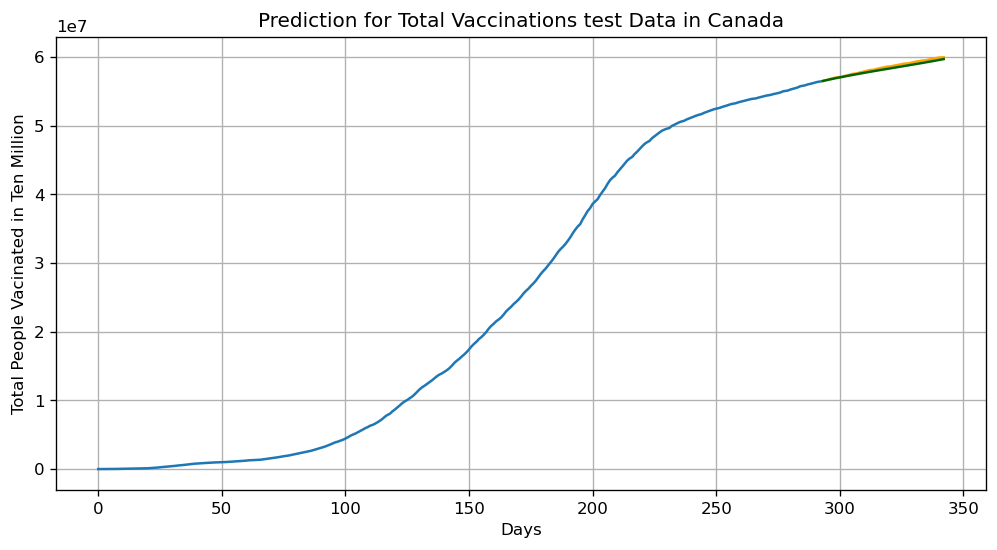

In [51]:
#Here I am splitting the values to train and test to verify the model.
train = canada_values[:293]
test = pd.DataFrame(canada_values[293:]) #50 samples as test data

#by tweeking p value as 3, I am getting better results. So taking p values as 3
model = stats.ARIMA(train, order=(3,0,3), trend='t')
model_fit = model.fit()
print(str(model_fit.summary())+'\n\n')

steps = 50
alpha = 0.05

forecast = model_fit.get_forecast(steps=steps)
fc = forecast.summary_frame(alpha=alpha)

index_of_fc = np.arange(len(train), len(train)+steps)

# make series for plotting purpose

test.index = index_of_fc
fc.index = index_of_fc
fc_series = fc['mean']
lower_series = fc['mean_ci_lower']
upper_series = fc['mean_ci_upper']

# Plot
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(train)
plt.plot(test, color='orange')
plt.plot(fc_series, color='darkgreen')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='blue', alpha=.15)
plt.title("Prediction for Total Vaccinations test Data in Canada")
plt.xlabel('Days')
plt.ylabel('Total People Vacinated in Ten Million')
plt.show()

From the above plot, It is evident that the test data and the prediction data are almost similar. Thus, concluding that the model performance is good and it is as expected and we can proceed with forecasting.

Now, I am taking complete data as the Train data for the model and forecasting the vaccinations after 50 days.

In [52]:
time_series = canada_values

#by tweeking p value as 3, I am getting better results. So taking p values as 3
model = stats.ARIMA(time_series, order=(3,0,3), trend='t')
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  343
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -4211.640
Date:                Wed, 15 Dec 2021   AIC                           8439.280
Time:                        17:46:35   BIC                           8469.982
Sample:                             0   HQIC                          8451.510
                                - 343                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.791e+05   3.46e-08   5.18e+12      0.000    1.79e+05    1.79e+05
ar.L1          0.9964      0.021     48.056      0.000       0.956       1.037
ar.L2          0.9990      0.041     24.491      0.0

**Note:** For the ARIMA Time series model with the trend, the model is not accepting the d value as 2. So, I am considering the d=0 for it.

**Reasoning:** If we do the differencing for the time series the trend in the data is getting suppressed. As we are converting the Non-stationary data to stationary data. But we are trying to continue the trend in the forecast too, so we are keeping d=0.

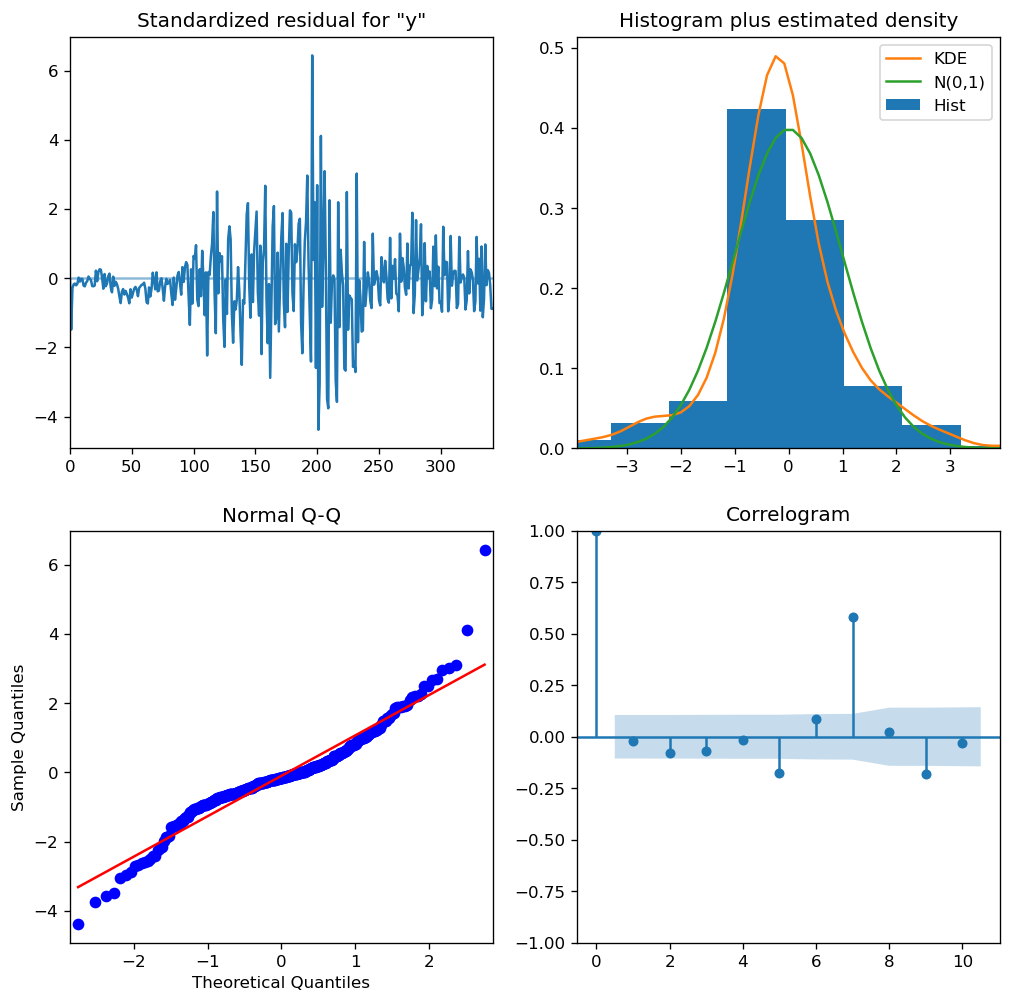

In [53]:
model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

**Expectation for good diagnostics plots:**<br>

**Standardized residual:**  There are no obvious patterns in the residuals.<br>
**Histogram plus KDE estimate:**  The KDE curve should be very similar to the normal distribution.<br>
**Normal Q-Q:** Most of the data points should lie on the straight line.<br>
**Correlogram:**  95% of correlations for lag greater than zero should not be significant<br>
-----------------------------------------------------------------------------<br>
**Actual plots:**<br>

**Standardized Residual:** There are no patterns observed in the plot, it is distributed around the 0, it's just simple white noise.<br>
**Histogram plus KDE estimate:**  The KDE curve is very similar to the normal distribution.<br>
**Normal Q-Q:** Most of the data points are around the line there are some outliers at the bottom and top of the line.<br>
**Correlogram:** Correlations for lag lies around the zero, with some lags outside the threshold zone/ significance region.<br>

**3.5 Canada Total Vaccinations forecast after 50 days**

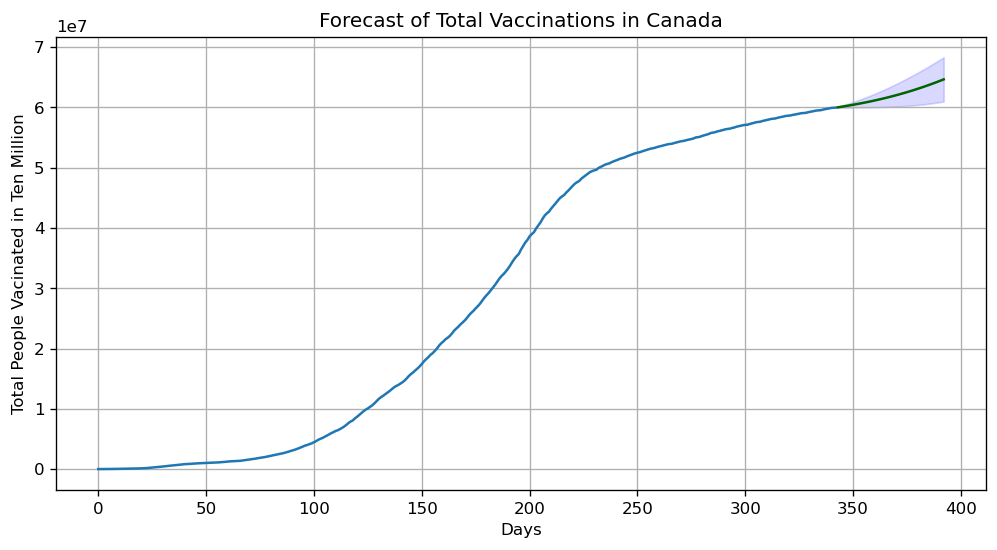

-------------------------------------------------------
Best Case scenario Vaccination forecast: 68319362.0
Base Case scenario Vaccination forecast: 64650519.0
Worst Case scenario Vaccination forecast: 60981677.0


In [54]:
steps = 50
alpha = 0.05

forecast = model_fit.get_forecast(steps=steps)
fc = forecast.summary_frame(alpha=alpha)

index_of_fc = np.arange(len(canada_values), len(canada_values)+steps)

# make series for plotting purpose
fc.index = index_of_fc
fc_series = fc['mean']
lower_series = fc['mean_ci_lower']
upper_series = fc['mean_ci_upper']

# Plot
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(canada_values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, lower_series, upper_series, color='blue', alpha=.15)
plt.title("Forecast of Total Vaccinations in Canada")
plt.xlabel('Days')
plt.ylabel('Total People Vacinated in Ten Million')
plt.show()

print('-------------------------------------------------------')
print('Best Case scenario Vaccination forecast:',round(upper_series.max(),0))
print('Base Case scenario Vaccination forecast:',round(fc_series.max(),0))
print('Worst Case scenario Vaccination forecast:',round(lower_series.max(),0))

From the above plot, we can observe the next 50 days Vaccinations forecast, with the best-case  scenario,  base-case  scenario, and  a third is worst-case scenario.<br>

After 50 days the forecast would be if the trend is continued as is. In the best-case scenario, we can observe count of vaccination is 68 Million, in the base-case scenario the count of vaccinations is 64 Million and in the worst-case scenario, the number of people vaccinated is 60 Million.

Now, let us perform the above steps for the United States Dataset.

**3.6. Finding the best p, d, q values for ARIMA model for United States Vaccination Data**<br>
Now, I am considering the United States' total vaccination data to find out the p, d, q values.

In [55]:
us_values = us_vaccine_data['total_vaccinations'].values

**Finding the best p for ARIMA model**<br>
From the below plot we can observe that two lags are going beyond the significance region/ critical range (blue colored range). So, we can say that the p-value is 2.<br>
**p = 2**

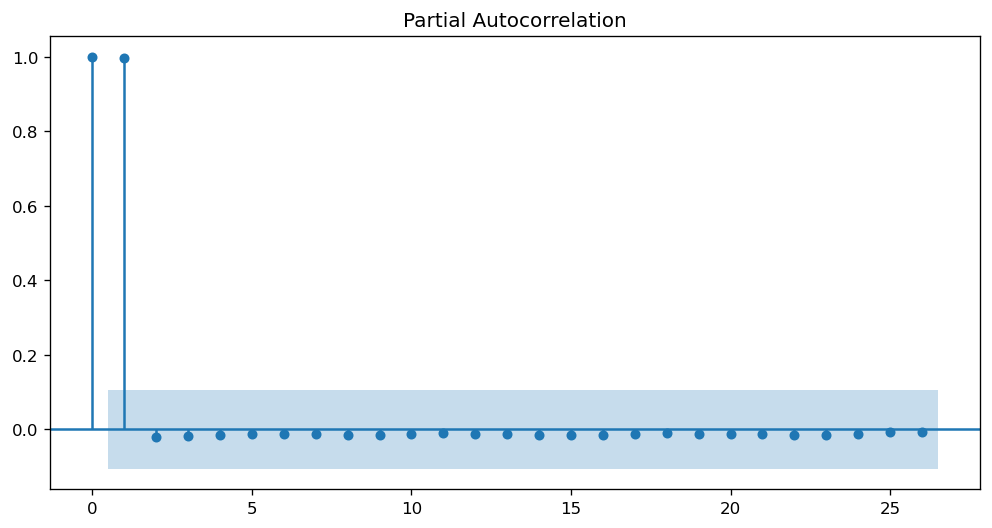

<Figure size 1200x600 with 0 Axes>

In [56]:
plot_pacf(us_values)
plt.figure(figsize=(10,5))
plt.show()

**Finding the best d & q value for ARIMA model**<br>
From the below plots, we can observe that for the second-order differencing we can observe the time series data has been stabilized i.e. no trend/ white noise.

**d = 3**

From the Auto correlation plot, we can observe from the last autocorrelation plot that at lag = 3 it's entering the significance region/ critical zone(blue region).

**q = 3**

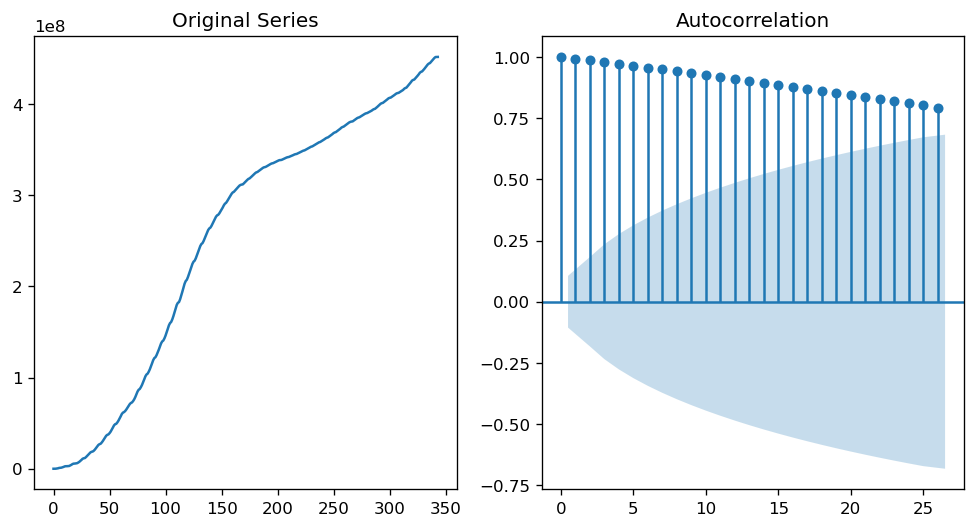

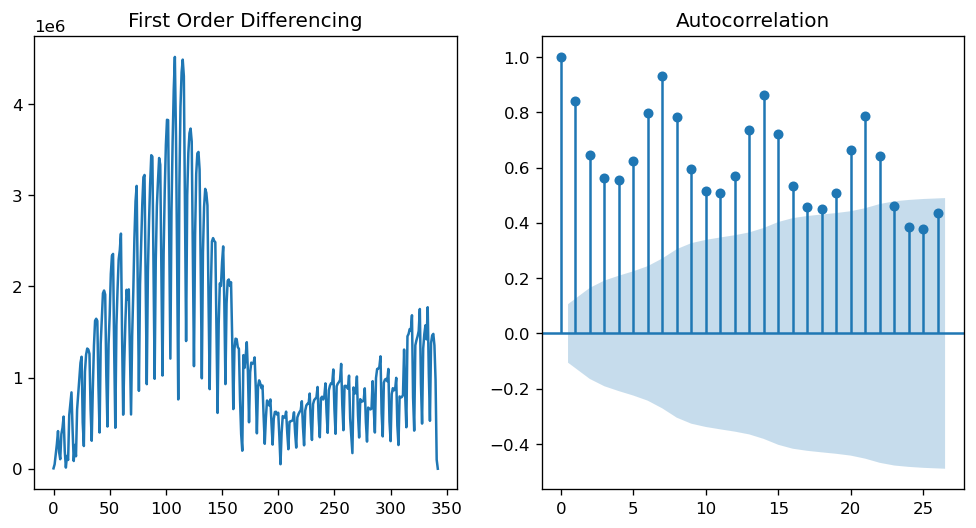

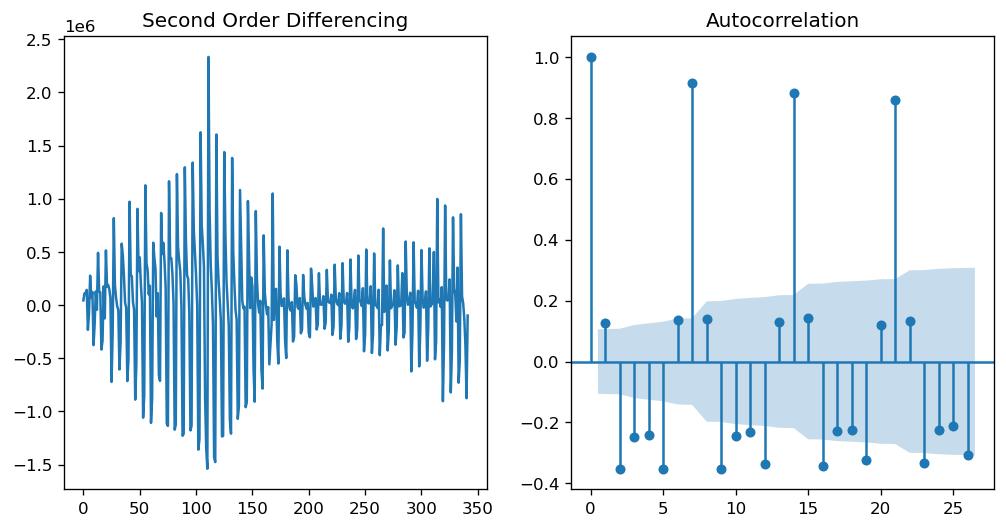

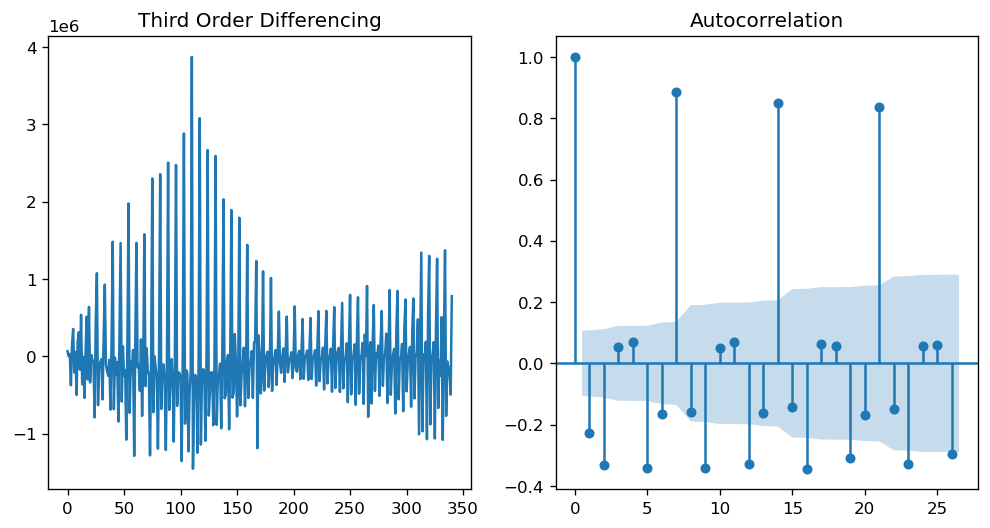

In [57]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})
# Original Series
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(us_values); 
ax1.set_title('Original Series')
plot_acf(us_values, ax=ax2)
plt.show()

# performing first order Differencing
first_diff = np.diff(us_values)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(first_diff); 
ax1.set_title('First Order Differencing')
plot_acf(first_diff, ax=ax2)
plt.show()

# performing second order Differencing
second_diff = np.diff(first_diff)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(second_diff); 
ax1.set_title('Second Order Differencing')
plot_acf(second_diff, ax=ax2)
plt.show()

# performing third order Differencing
third_diff = np.diff(second_diff)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(third_diff); 
ax1.set_title('Third Order Differencing')
plot_acf(third_diff, ax=ax2)
plt.show()

**Note:**<br>
So, the above steps are performed to find out the best values for the p,d,q else we can use the auto_arima function.<br>
auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC

**3.7. Creating ARIMA Model to forecast United States Vaccination**

Let us plot the total vaccinations trend for United States.

In [58]:
print('Number of days in United States Vacination data:',len(us_vaccine_data.date))
print('Number of months in United States Vacination data:',len(us_vaccine_data.date)/30)
print('Minimum Date:',us_vaccine_data.date.min())
print('Maximum Date:',us_vaccine_data.date.max())
print('Minimum Total Vaccination:',us_vaccine_data.total_vaccinations.min())
print('Maximum Total Vaccination:',us_vaccine_data.total_vaccinations.max())

Number of days in United States Vacination data: 344
Number of months in United States Vacination data: 11.466666666666667
Minimum Date: 2020-12-13
Maximum Date: 2021-11-21
Minimum Total Vaccination: 21800.0
Maximum Total Vaccination: 451453834.0


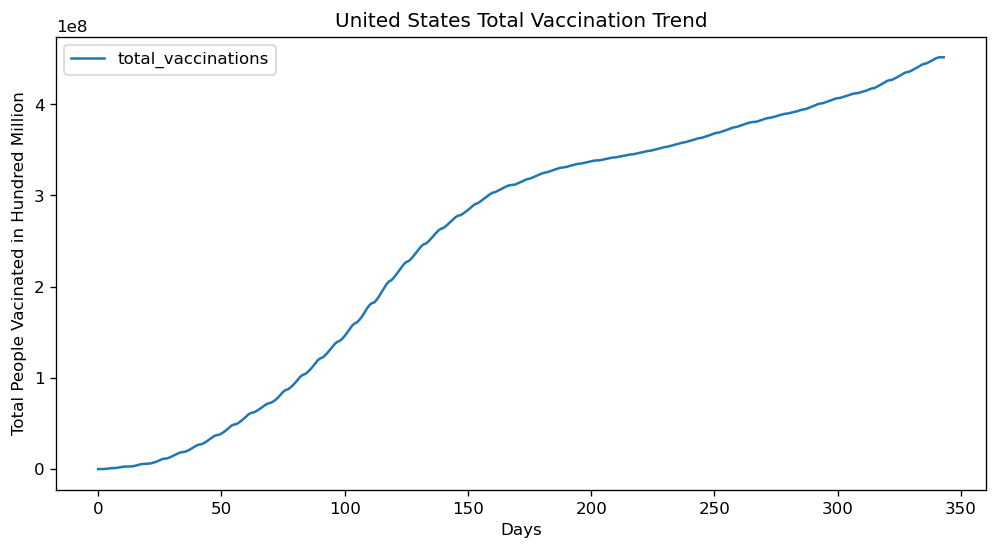

In [59]:
#plotting the total vaccinations trend for Canada location
us_vaccine_data[['date', 'total_vaccinations']].plot(kind='line')
plt.xlabel('Days')
plt.ylabel('Total People Vacinated in Hundred Million')
plt.title('United States Total Vaccination Trend')
plt.show()

The above plot tells the people vaccinated trend between from 2020-12-13 to 2021-11-21 days. We can observe that there is an exponential increase in the total vaccinations.

Same as the Canada Vaccination data. For the United States, When I look at the data.<br>
Total Vaccinations = People Vaccinated with 1st dose + People Vaccinated with the 2nd dose.<br>

So, when we try to forecast the vaccinations, we need to consider the Total Vaccinations column as the People vaccinated column does not have the values of the count of people who are fully vaccinated on that day.<br>

Let us assume on a given day if people are only vaccinated with a second dose we miss may miss the vaccination stats for the specific country on that day.
And also we have many zero's in the people vaccinated column it's better to use the total people vaccinated column.

In [60]:
us_values = us_vaccine_data['total_vaccinations'].values

**Verifying the performance of model**<br>
Here, I am splitting the test set as 50 and remaining to train the model.<br>
**Why 50?:** In the forecast, we are trying to predict the vaccination forecast after 50 days. So Making a test-set of 50 entries will make the perfect evaluation for the model.<br>

For the ARIMA model, I am using trend = 't' which indicates the linear trend in time.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  294
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -4308.228
Date:                Wed, 15 Dec 2021   AIC                           8630.455
Time:                        17:46:36   BIC                           8656.241
Sample:                             0   HQIC                          8640.782
                                - 294                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.544e+06   1.42e-08   1.08e+14      0.000    1.54e+06    1.54e+06
ar.L1          0.3474      0.040      8.603      0.000       0.268       0.426
ar.L2          0.6516      0.040     16.142      0.0

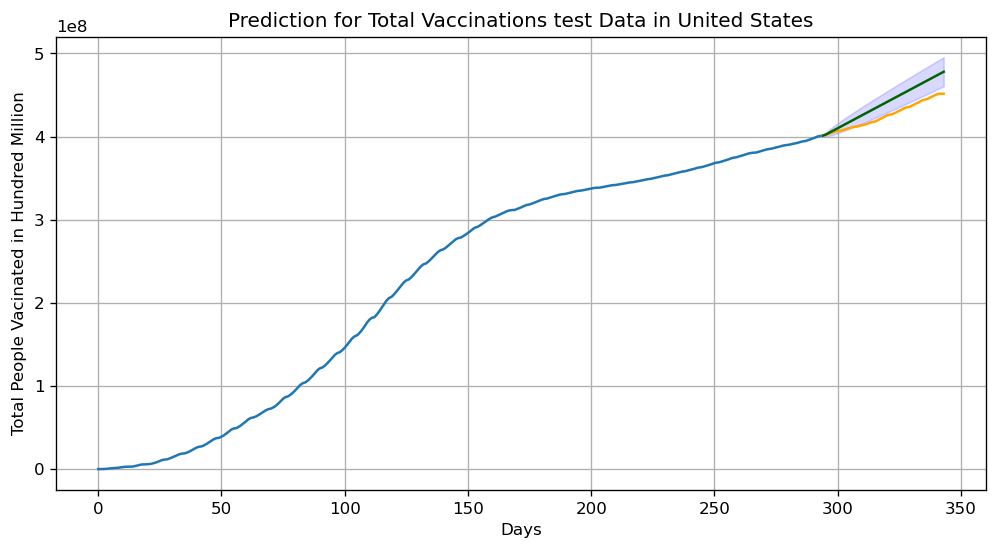

In [61]:
#Here I am splitting the values to train and test to verify the model.
train = us_values[:294]
test = pd.DataFrame(us_values[294:]) #50 samples as test data

model = stats.ARIMA(train, order=(2,0,3), trend='t')
model_fit = model.fit()
print(str(model_fit.summary())+'\n\n')

steps = 50
alpha = 0.05

forecast = model_fit.get_forecast(steps=steps)
fc = forecast.summary_frame(alpha=alpha)

index_of_fc = np.arange(len(train), len(train)+steps)

# make series for plotting purpose

test.index = index_of_fc
fc.index = index_of_fc
fc_series = fc['mean']
lower_series = fc['mean_ci_lower']
upper_series = fc['mean_ci_upper']

# Plot
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(train)
plt.plot(test, color='orange')
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, lower_series, upper_series, color='blue', alpha=.15)
plt.title("Prediction for Total Vaccinations test Data in United States")
plt.xlabel('Days')
plt.ylabel('Total People Vacinated in Hundred Million')
plt.show()

From the above plot, It is evident that the test data and the prediction data are almost similar. Thus, concluding that the model performance is good and it is as expected.

Now, I am taking complete data as the Train data for the model and forecasting the vaccinations after 50 days.

In [62]:
time_series = us_values

#by tweeking q value as 2, I am getting better results. So taking q values as 2
model = stats.ARIMA(time_series, order=(2,0,2), trend='t')
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  344
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4968.677
Date:                Wed, 15 Dec 2021   AIC                           9949.353
Time:                        17:46:37   BIC                           9972.397
Sample:                             0   HQIC                          9958.531
                                - 344                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.463e+06   4.57e-09    3.2e+14      0.000    1.46e+06    1.46e+06
ar.L1          1.9957      0.006    330.268      0.000       1.984       2.008
ar.L2         -0.9961      0.006   -163.001      0.0

**Note:** For the ARIMA Time series model with the trend, the model is not accepting the d value as 2/ 3. So, I am considering the d=0 for it.

**Reasoning:** If we do the differencing for the time series the trend in the data is getting suppressed. As we are converting the Non-stationary data to stationary data. But we are trying to continue the trend in the forecast too, so we are keeping d=0.

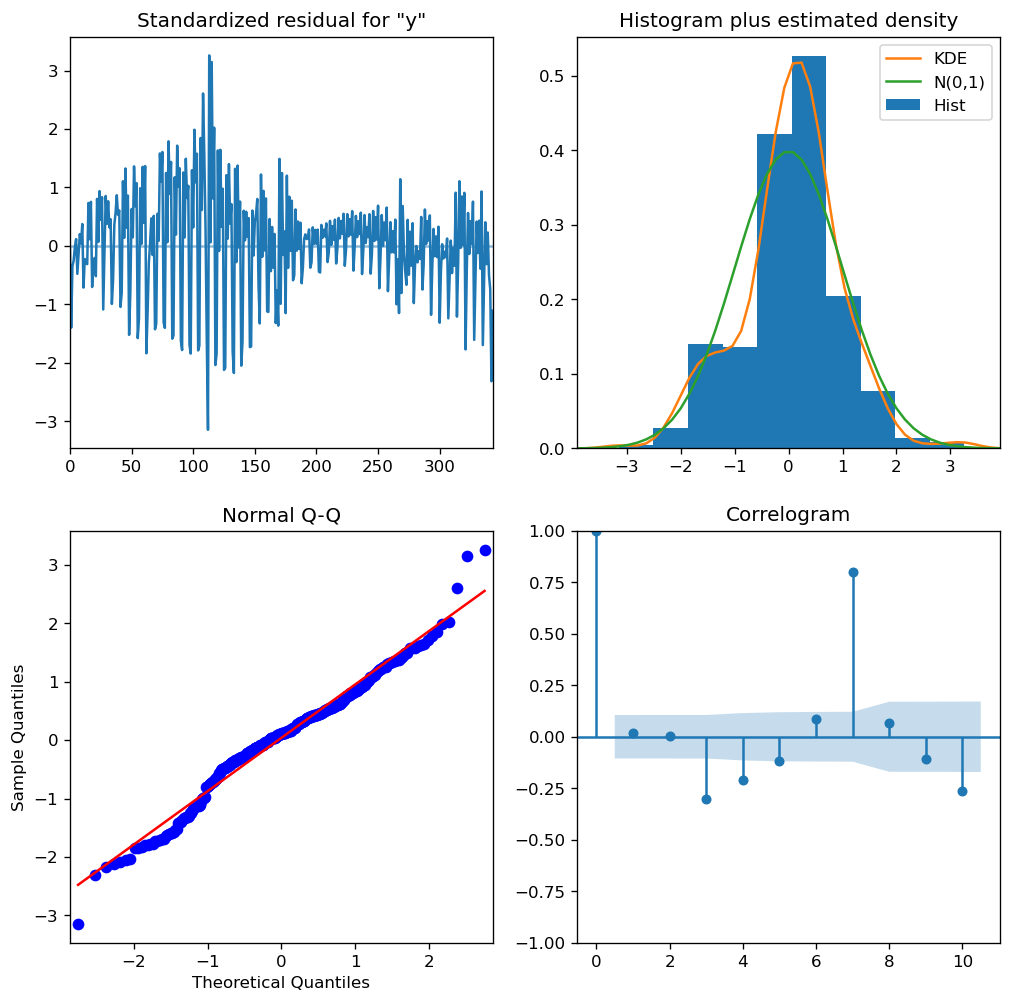

In [63]:
model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

**Expectation for good diagnostics plots:**<br>

**Standardized residual:**  There are no obvious patterns in the residuals.<br>
**Histogram plus KDE estimate:**  The KDE curve should be very similar to the normal distribution.<br>
**Normal Q-Q:** Most of the data points should lie on the straight line.<br>
**Correlogram:**  95% of correlations for lag greater than zero should not be significant<br>
-----------------------------------------------------------------------------<br>
**Actual plots:**<br>

**Standardized Residual:** There are no patterns observed in the plot, it is distributed around the 0, it's just simple white noise.<br>
**Histogram plus KDE estimate:**  The KDE curve is very similar to the normal distribution.<br>
**Normal Q-Q:** Most of the data points are around the line there are some outliers at the bottom and top of the line.<br>
**Correlogram:** Correlations for lag lies around the zero, with some lags outside the threshold zone/ significance region.<br>

**3.8 United States Total Vaccinations forecast after 50 days**

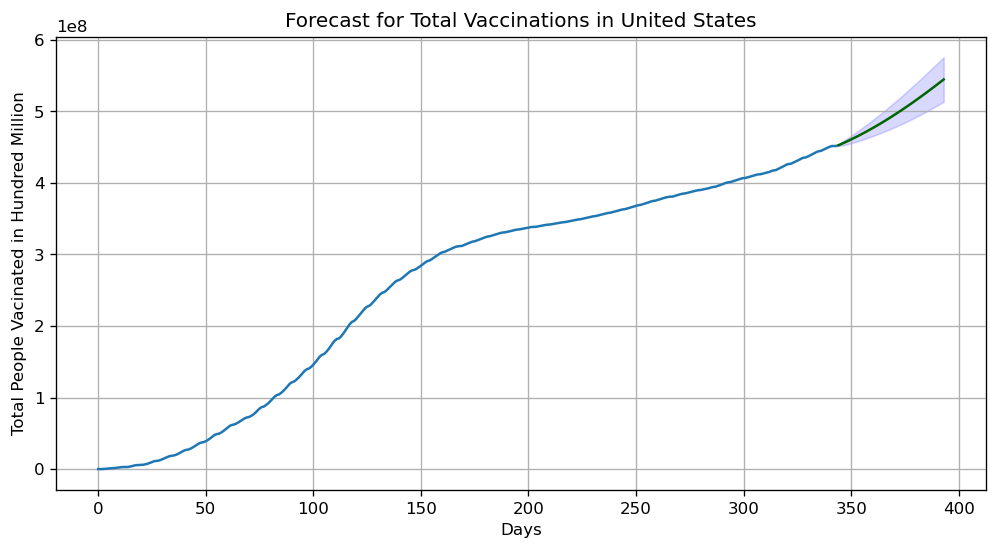

-------------------------------------------------------
Best Case scenario Vaccination forecast: 575401119.0
Base Case scenario Vaccination forecast: 544359355.0
Worst Case scenario Vaccination forecast: 513317591.0


In [64]:
steps = 50
alpha = 0.05

forecast = model_fit.get_forecast(steps=steps)
fc = forecast.summary_frame(alpha=alpha)

index_of_fc = np.arange(len(us_values), len(us_values)+steps)

# make series for plotting purpose
fc.index = index_of_fc
fc_series = fc['mean']
lower_series = fc['mean_ci_lower']
upper_series = fc['mean_ci_upper']

# Plot
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(us_values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, lower_series, upper_series, color='blue', alpha=.15)
plt.title("Forecast for Total Vaccinations in United States")
plt.xlabel('Days')
plt.ylabel('Total People Vacinated in Hundred Million')
plt.show()

print('-------------------------------------------------------')
print('Best Case scenario Vaccination forecast:',round(upper_series.max(),0))
print('Base Case scenario Vaccination forecast:',round(fc_series.max(),0))
print('Worst Case scenario Vaccination forecast:',round(lower_series.max(),0))

From the above plot we can observe the next 50 days Vaccinations forecast for the United States with a 95% Confidence Interval, above one is for the best-case  scenario,  base-case  scenario, and  a third is a worst-case scenario.<br>

After 50 days the forecast would be if the trend is continued. In the best-case scenario, we can observe count of vaccination is 575 Million, in the base case scenario the count of vaccinations are 544 Million and in the worst-case scenario, the number of people vaccinated is 513 Million.

# 4. Relating COVID-19 Vaccination to a Second Dataset

In [65]:
# importing complete dataset
complete_data = pd.read_csv("Complete_covid19_dataset.csv")
complete_data.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

let us find out the count of missing values in each columns.

In [66]:
complete_data.isna().sum()

iso_code                                        0
continent                                    8578
location                                        0
date                                            0
total_cases                                  7393
                                            ...  
human_development_index                     18176
excess_mortality_cumulative_absolute       129736
excess_mortality_cumulative                129736
excess_mortality                           129736
excess_mortality_cumulative_per_million    129736
Length: 67, dtype: int64

Dropping the Nan values in the total vaccinations columns is similar to Vaccination data.<br>
**Reason:** As we are comparing the between Vaccinations and other metrics, So the vaccinations column should not be Nan.

In [67]:
complete_data = complete_data.drop(complete_data[complete_data.total_vaccinations.isna()].index)
complete_data.isna().sum()

iso_code                                       0
continent                                   3902
location                                       0
date                                           0
total_cases                                 1767
                                           ...  
human_development_index                     5792
excess_mortality_cumulative_absolute       32599
excess_mortality_cumulative                32599
excess_mortality                           32599
excess_mortality_cumulative_per_million    32599
Length: 67, dtype: int64

**4.1. Relating Canada Total Vaccinations count with other metrics**

In [68]:
canada_complete_data = complete_data[complete_data.location == 'Canada'].reset_index()
canada_complete_data.drop('index', axis=1, inplace=True)
canada_complete_data.sort_values('total_vaccinations', inplace=True)
canada_complete_data.head()

iso_code      continent location        date  total_cases  new_cases  \
0      CAN  North America   Canada  2020-12-14     474661.0     8645.0   
1      CAN  North America   Canada  2020-12-15     480952.0     6291.0   
2      CAN  North America   Canada  2020-12-16     487685.0     6733.0   
3      CAN  North America   Canada  2020-12-17     495152.0     7467.0   
4      CAN  North America   Canada  2020-12-18     502197.0     7045.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0            6658.143       13677.0       140.0              111.571  ...   
1            6661.714       13793.0       116.0              114.286  ...   
2            6706.857       13911.0       118.0              114.571  ...   
3            6830.143       14067.0       156.0              120.000  ...   
4            6849.000       14180.0       113.0              117.857  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0            12.0          16.6                     NaN   
1            12.0          16.6                     NaN   
2            12.0          16.6                     NaN   
3            12.0          16.6                     NaN   
4            12.0          16.6                     NaN   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         2.5            82.43                    0.929   
1                         2.5            82.43                    0.929   
2                         2.5            82.43                    0.929   
3                         2.5            82.43                    0.929   
4                         2.5            82.43                    0.929   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [69]:
#finding missing values in Canada complete data
canada_complete_data.isna().sum()

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
human_development_index                      0
excess_mortality_cumulative_absolute       311
excess_mortality_cumulative                311
excess_mortality                           311
excess_mortality_cumulative_per_million    311
Length: 67, dtype: int64

From the above chart, It can be observed that there are some NaN values in the columns. Let us assume that there we no admissions or no entries for that day so we will leave the NaN values as is.

Let us plot the correlation metrics to find the relationship between the Covid 19 vaccinations and column values.

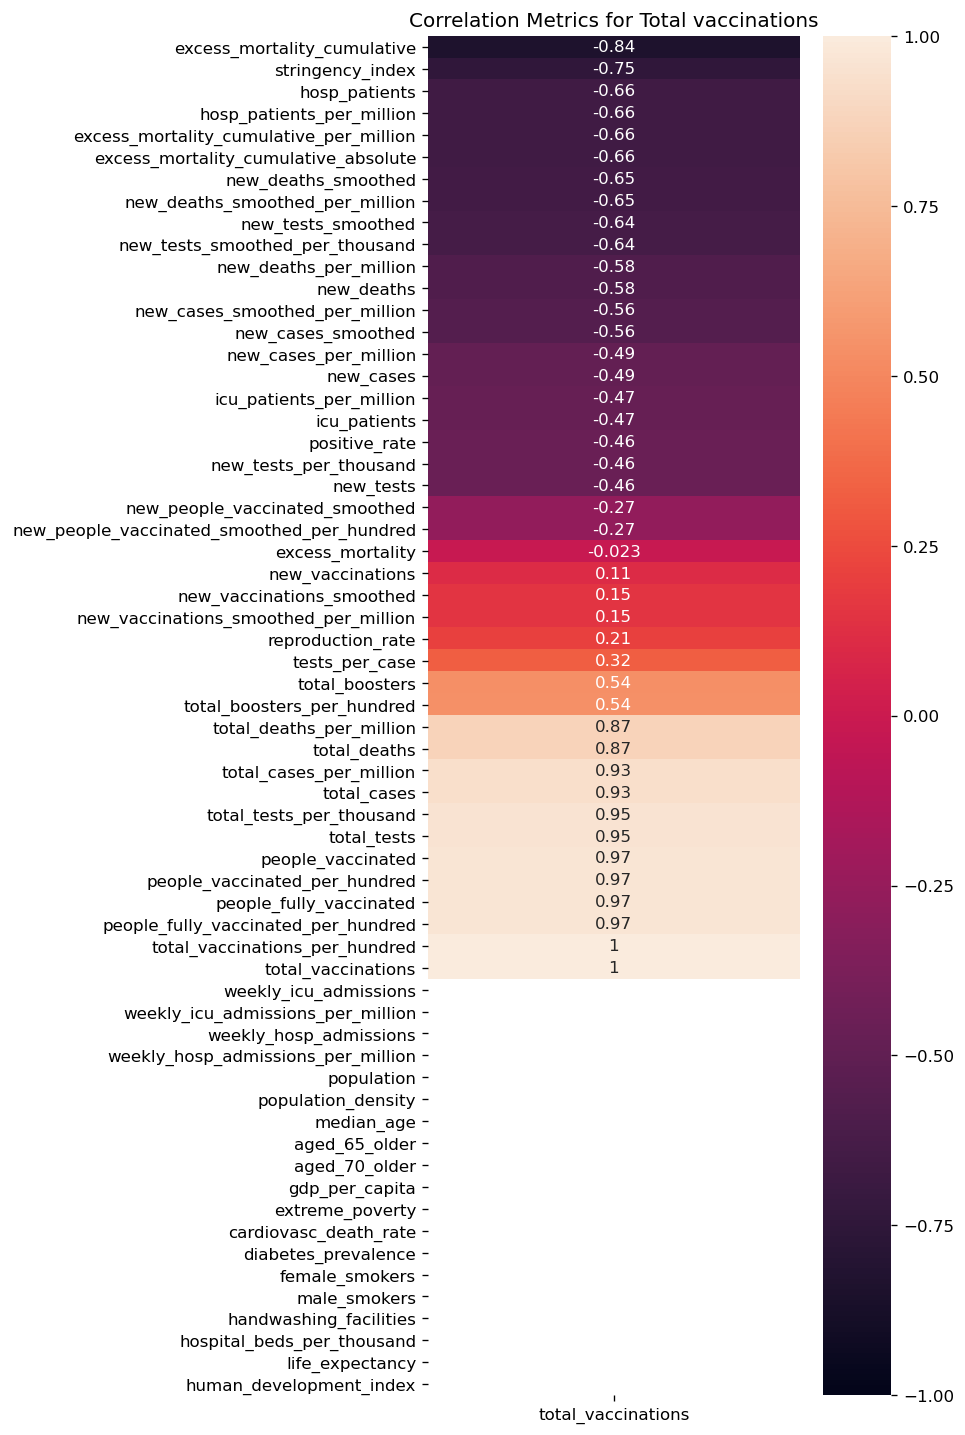

In [70]:
#correlation metrics
plt.figure(figsize=(5, 15))
heatmap = sns.heatmap(canada_complete_data.corr()[['total_vaccinations']].sort_values('total_vaccinations'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Metrics for Total vaccinations');

From the above Correlation Metrics, we can observe the relationship between the vaccinations count and other metrics in Canada.<br>

There are some positive and negative correlations between the features and Total vaccinations.<br>

Let us consider, some positively and negatively correlated features.<br>

**Positive Correlation with Total Vaccinations:**<br>
These feature values increase with the increase in the Total Vaccination count, in simple terms we can say that the features are directly proportional to the Total vaccinations. It's surprising why these characteristics are associated with total vaccination. However, there is a reason for this. Over a year, we can see that the number of fatalities and cases began to rise, and the government increased the vaccination count to the public to halt the spread and deaths. And now that individuals have been vaccinated, the number of cases and deaths has reduced.<br>
1. Total Cases & Total Vaccinations
2. Total Deaths & Total Vaccinations


**Negative Correlation with Total Vaccinations:**<br>
These are the features in which values decrease with an increase in Total vaccination count and vice versa in simple terms we can say the feature is inversely proportional to the total vaccinations.<br>
1. Hospitalized Patients & Total Vaccinations
2. New deaths smoothed & Total Vaccinations
3. New Cases/ tests Smoothed & Total Vaccinations
4. ICU Patients & Total Vaccinations

**Let us plot the daily covid cases trend in Canada**

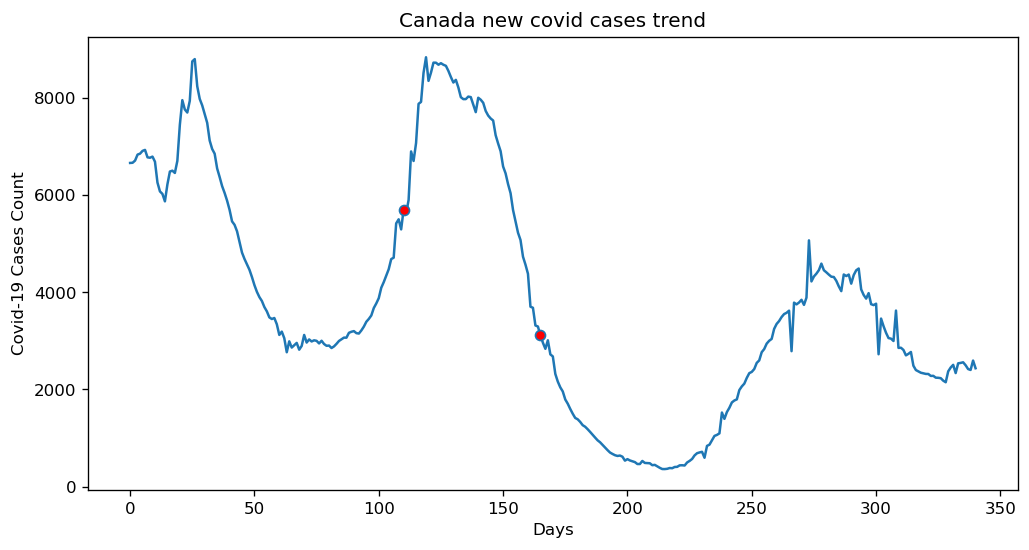

In [71]:
canada_complete_data.new_cases_smoothed.plot(markevery=[110, 165], marker='o', markerfacecolor='r')
plt.xlabel('Days')
plt.ylabel('Covid-19 Cases Count')
plt.title('Canada new covid cases trend')
plt.show()

The Red Markers in the above plot represent the approximate start and end of the Third Wave in Canada. During that period, we can observe a significant increase in the daily Coivd cases.

**4.2. Positive Correlation with Total Vaccinations**

The Red Markers or the Red vertical lines indicate the third wave period in Canada.

**Total Cases & Total Vaccinations**

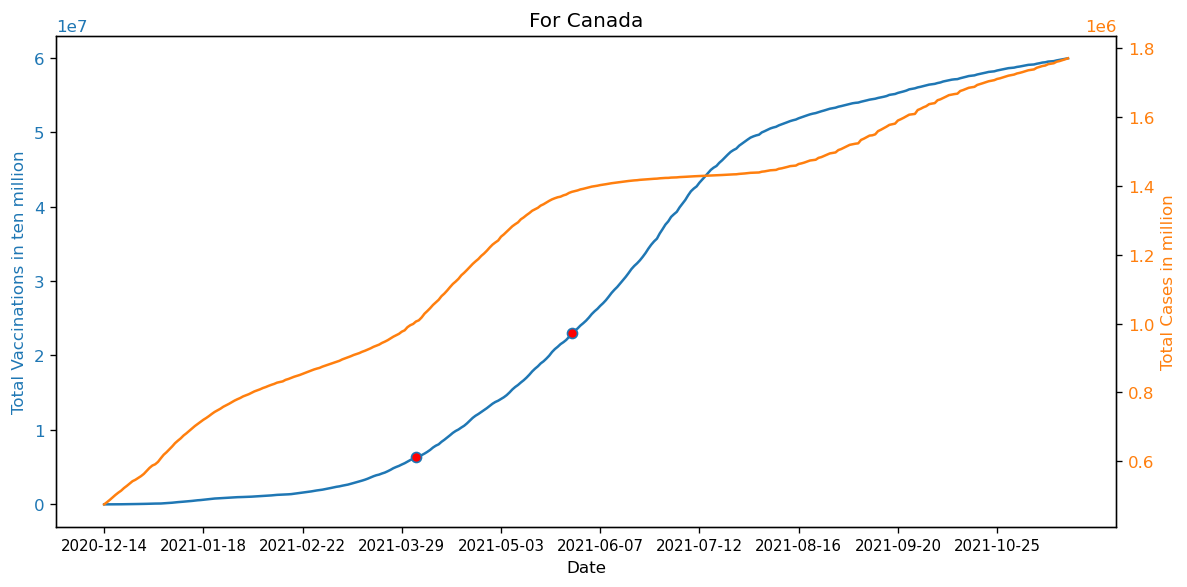

In [72]:

X = canada_complete_data.date
data1 = canada_complete_data.total_vaccinations
data2 = canada_complete_data.total_cases

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in ten million', color=color)
ax1.plot(X, data1, color=color, markevery=[110, 165], marker='o', markerfacecolor='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Total Cases in million', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('For Canada')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

From the above plot, we can observe that with the increase in the total vaccinations, new cases started to decrease from 2021-05-03 to 2021-08-16 the total cases count is almost flat during that period. And the cases again started to increase from  2021-08-16, this might be due to the start of a wave in Canada.

But, We can say that during the given period. During the initial days, the new cases increased exponentially, but with the increase in the vaccinations, the trend of the new covid cases has been changed to a gradual increase.

**Total Deaths & Total Vaccinations**

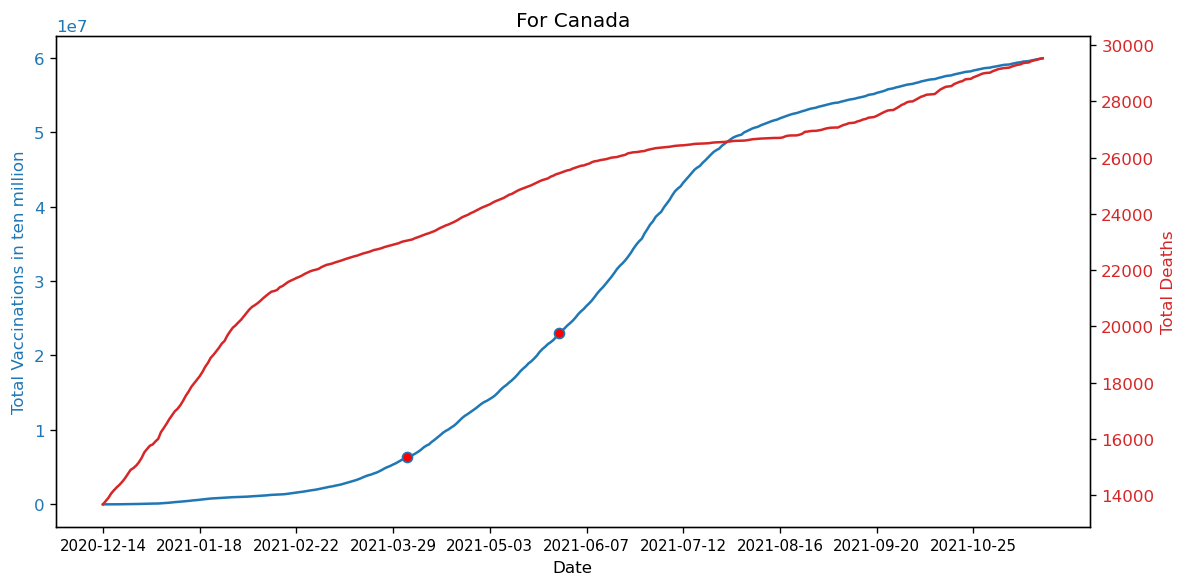

In [73]:

X = canada_complete_data.date
data1 = canada_complete_data.total_vaccinations
data2 = canada_complete_data.total_deaths

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in ten million', color=color)
ax1.plot(X, data1, color=color, markevery=[110, 165], marker='o', markerfacecolor='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Total Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('For Canada')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The above plot represents the relationship between the total vaccinations and total deaths. When the total vaccinations in Canada started to increase this reduced the complications in covid 19 patients as more people are vaccinated. In the given data during the initial stages, the total deaths started to increase exponentially and almost become flat during the period of 2021-06-07 and 2021-08-16, and total deaths started to increase again slightly.

**4.3. Negative Correlation with Total Vaccinations**

**Hospitalized Patients & Total Vaccinations**

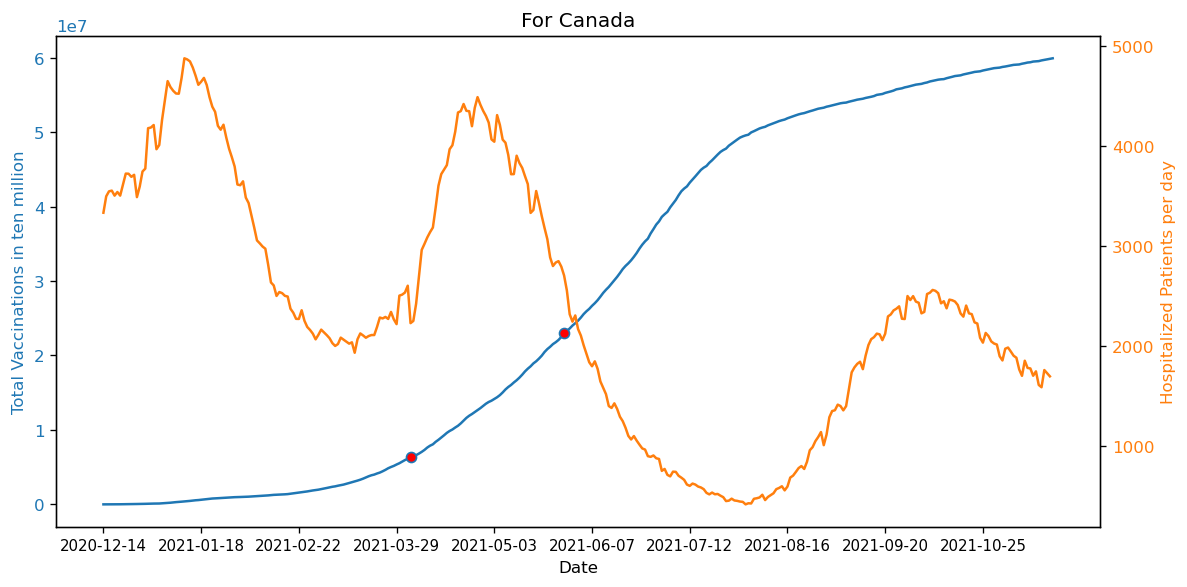

In [74]:

X = canada_complete_data.date
data1 = canada_complete_data.total_vaccinations
data2 = canada_complete_data.hosp_patients

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in ten million', color=color)
ax1.plot(X, data1, color=color, markevery=[110, 165], marker='o', markerfacecolor='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Hospitalized Patients per day', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('For Canada')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

from the above plot, we can observe that the daily hospitalization counts started to increase and decrease over the period. But with the increase in the total vaccinations after 2021-06-07 now the daily hospitalization numbers are fluctuating between 500 to 2500 before the exponential increase in the vaccinations the hospitalization count used to fluctuate between 2000 to 5000.

**New deaths smoothed & Total Vaccinations**

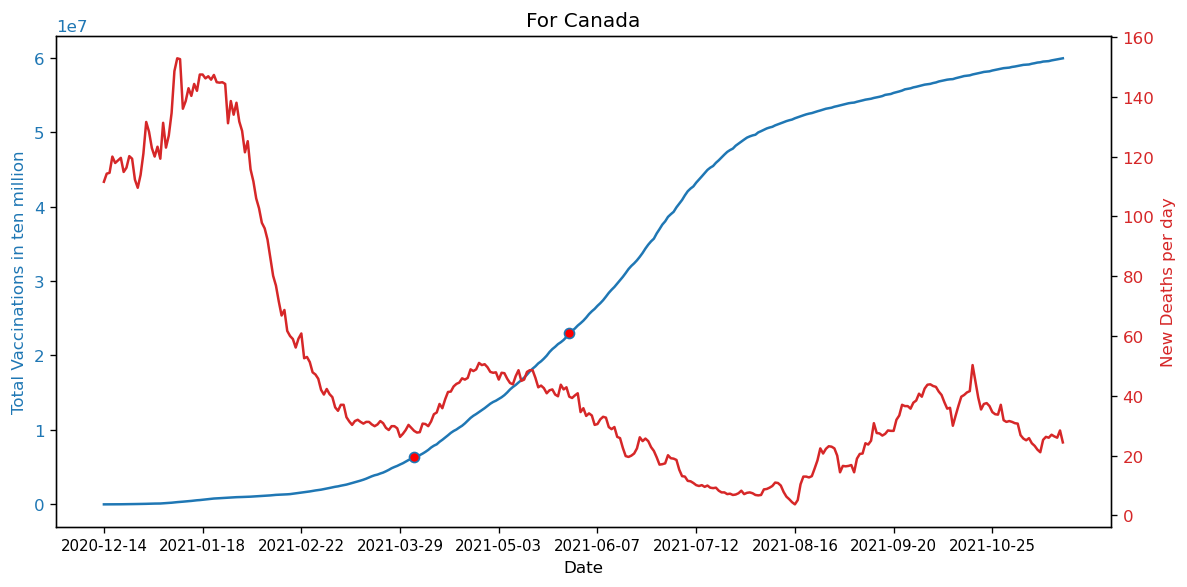

In [75]:

X = canada_complete_data.date
data1 = canada_complete_data.total_vaccinations
data2 = canada_complete_data.new_deaths_smoothed

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in ten million', color=color)
ax1.plot(X, data1, color=color, markevery=[110, 165], marker='o', markerfacecolor='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('New Deaths per day', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('For Canada')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

From the above plot in the given period, it's evident that the increase in the vaccination count has decreased the daily new deaths. This is the primary reason for the government getting people vaccinated to decrease the new cases and deaths from Covid-19.

**New Cases Smoothed & Total Vaccinations**

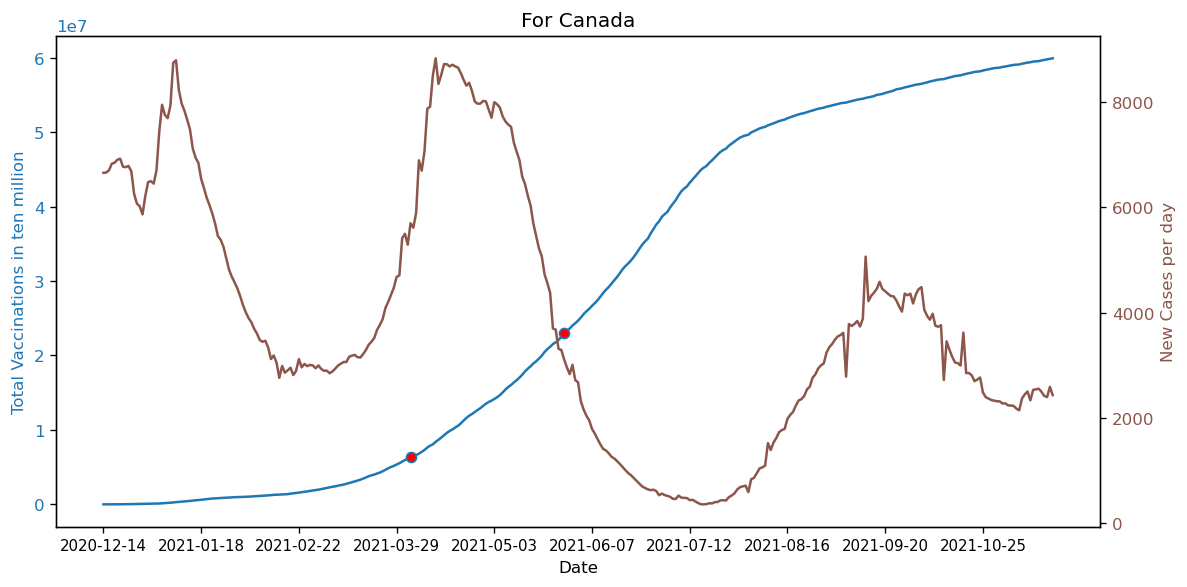

In [76]:

X = canada_complete_data.date
data1 = canada_complete_data.total_vaccinations
data2 = canada_complete_data.new_cases_smoothed

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in ten million', color=color)
ax1.plot(X, data1, color=color, markevery=[110, 165], marker='o', markerfacecolor='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
ax2.set_ylabel('New Cases per day', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('For Canada')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

New Covid-19 cases follow a similar trend as the New Hospitalization cases. with the increase in total vaccination count, the daily average covid-19 cases started to downfall.

**ICU Patients & Total Vaccinations**

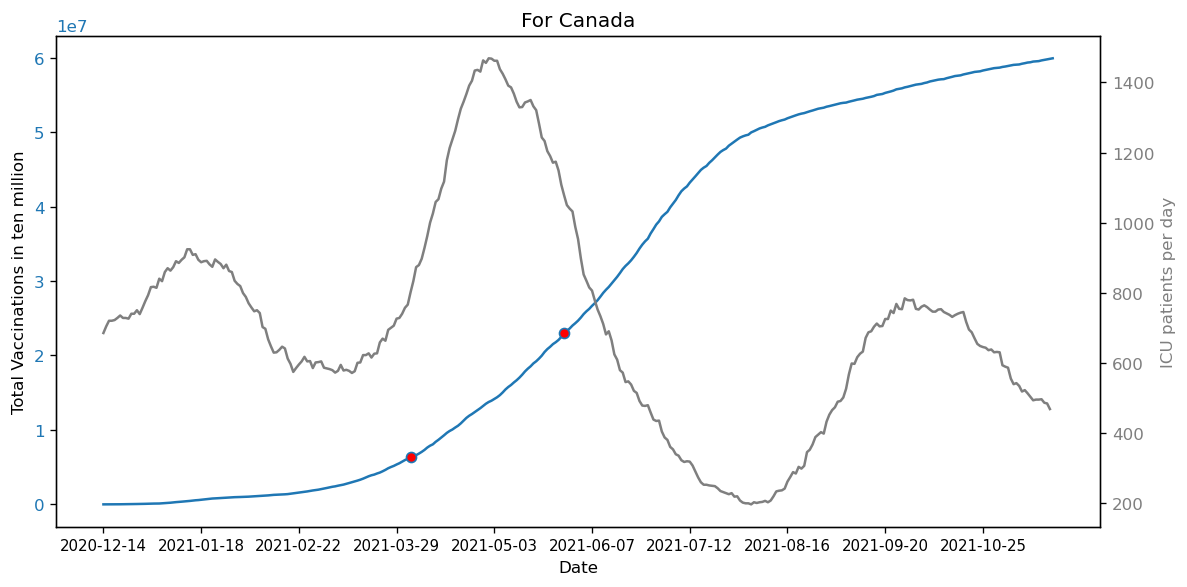

In [77]:

X = canada_complete_data.date
data1 = canada_complete_data.total_vaccinations
data2 = canada_complete_data.icu_patients

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in ten million')
ax1.plot(X, data1, color=color, markevery=[110, 165], marker='o', markerfacecolor='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('ICU patients per day', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('For Canada')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

From the above plot, we can observe that the trend followed by the new ICU patients is similar to the new cases, new deaths, new hospitalizations. This all directly says that as the Vaccinations count increase all the impact of the Covid-19 virus in human life started to decrease. This includes the new daily ICU patients count.

**Combination of Correlated features**

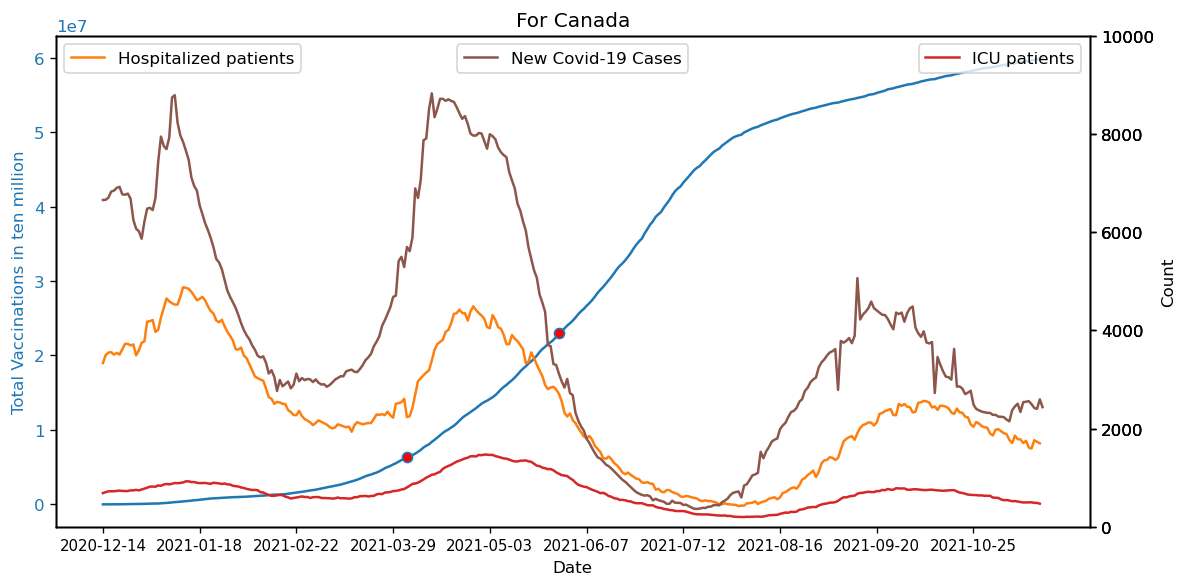

In [78]:
X = canada_complete_data.date
data1 = canada_complete_data.total_vaccinations
data2 = canada_complete_data.hosp_patients
data3 = canada_complete_data.new_cases_smoothed
data4 = canada_complete_data.icu_patients

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in ten million', color=color)
ax1.plot(X, data1, color=color, markevery=[110, 165], marker='o', markerfacecolor='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()
ax4 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Count')
ax2.plot(X, data2, color=color, label='Hospitalized patients')
ax2.set_ylim(0, 10000)
ax2.legend(loc='upper left')

color = 'tab:brown'
ax3.plot(X, data3, color=color, label='New Covid-19 Cases')
ax3.set_ylim(0, 10000)
ax3.legend(loc='upper center')

color = 'tab:red'
ax4.plot(X, data4, color=color, label='ICU patients')
ax4.set_ylim(0, 10000)
ax4.legend(loc='upper right')

plt.title('For Canada')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The two marker points indicate the approximate start and end of the Covid-19 third wave in Canada. During that phase, there is exponential growth in the Covid-19 cases and hospitalization of people.

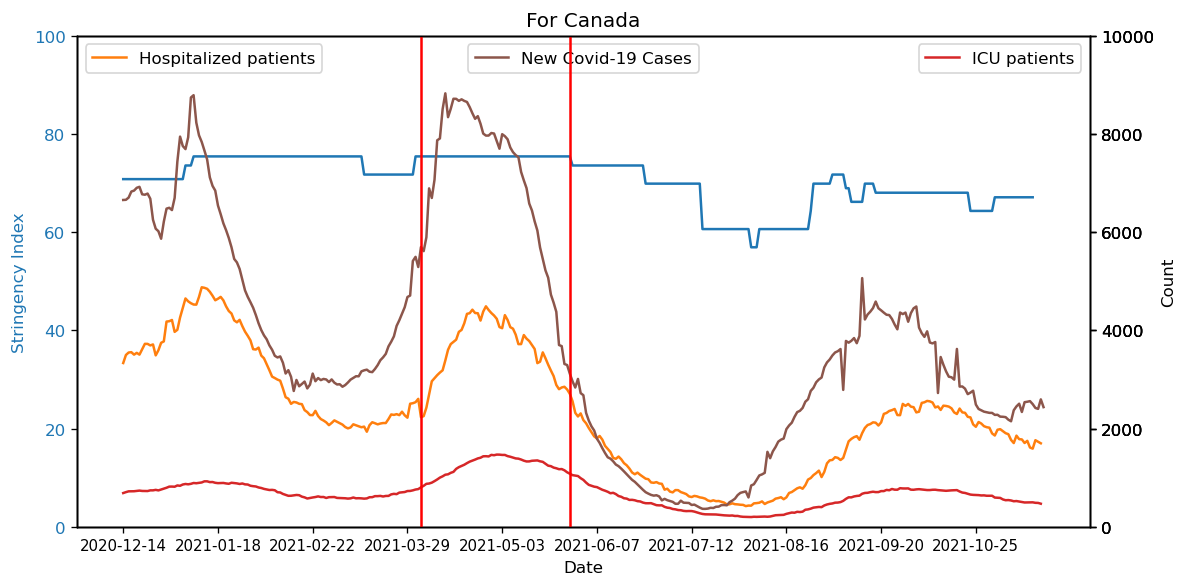

In [79]:
X = canada_complete_data.date
data1 = canada_complete_data.stringency_index
data2 = canada_complete_data.hosp_patients
data3 = canada_complete_data.new_cases_smoothed
data4 = canada_complete_data.icu_patients

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Stringency Index', color=color)
ax1.set_ylim(0,100)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()
ax4 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Count')
ax2.plot(X, data2, color=color, label='Hospitalized patients')
ax2.set_ylim(0, 10000)
ax2.legend(loc='upper left')

color = 'tab:brown'
ax3.plot(X, data3, color=color, label='New Covid-19 Cases')
ax3.set_ylim(0, 10000)
ax3.legend(loc='upper center')

color = 'tab:red'
ax4.plot(X, data4, color=color, label='ICU patients')
ax4.set_ylim(0, 10000)
ax4.legend(loc='upper right')

plt.title('For Canada')
plt.axvline(x=canada_complete_data.date[110], color='red')
plt.axvline(x=canada_complete_data.date[165], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

- There is a sudden increase in the Covid-19 cases during the year-end of 2020, this might be the reason due to Christmas.


- From the above plot, the red-colored vertical lines represent the Covid-19 third wave in Canada which started at starting of April and continued till may end.

- Stringency Index is the level of restriction set by the government to control the Covid-19 pandemic spread. We can see that the index is high in the initial days and has been reduced at the end when the covid-19 cases have been reduced and when the vaccination target has been reached.

**4.4. Relating United States Total Vaccinations count with other metrics**

In [80]:
us_complete_data = complete_data[complete_data.location == 'United States'].reset_index()
us_complete_data.drop('index', axis=1, inplace=True)
us_complete_data.sort_values('total_vaccinations', inplace=True)
us_complete_data.head()

iso_code      continent       location        date  total_cases  new_cases  \
0      USA  North America  United States  2020-12-13   16471966.0   186705.0   
1      USA  North America  United States  2020-12-14   16672597.0   200631.0   
2      USA  North America  United States  2020-12-15   16894649.0   222052.0   
3      USA  North America  United States  2020-12-16   17135340.0   240691.0   
4      USA  North America  United States  2020-12-17   17372569.0   237229.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0          218005.714      303465.0      1659.0             2554.571  ...   
1          219503.000      305114.0      1649.0             2567.429  ...   
2          218232.000      308101.0      2987.0             2625.143  ...   
3          221025.429      311834.0      3733.0             2704.000  ...   
4          221390.143      315284.0      3450.0             2770.286  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0            19.1          24.6                     NaN   
1            19.1          24.6                     NaN   
2            19.1          24.6                     NaN   
3            19.1          24.6                     NaN   
4            19.1          24.6                     NaN   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                        2.77            78.86                    0.926   
1                        2.77            78.86                    0.926   
2                        2.77            78.86                    0.926   
3                        2.77            78.86                    0.926   
4                        2.77            78.86                    0.926   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                              394357.9                        14.13   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0             39.73                               1184.56006  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [81]:
#finding missing values in United states complete data
us_complete_data.isna().sum()

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
human_development_index                      0
excess_mortality_cumulative_absolute       299
excess_mortality_cumulative                299
excess_mortality                           299
excess_mortality_cumulative_per_million    299
Length: 67, dtype: int64

From the above chart, It can be observed that there are some NaN values in the columns. Let us assume that there we no admissions or no entries for that day so we will leave the NaN values as is.

In [82]:
# us_complete_data.fillna(0, inplace=True)
# us_complete_data.isna().sum()

Let us plot the correlation metrics to find the relationship between the Covid 19 vaccinations and column values for United States Data.

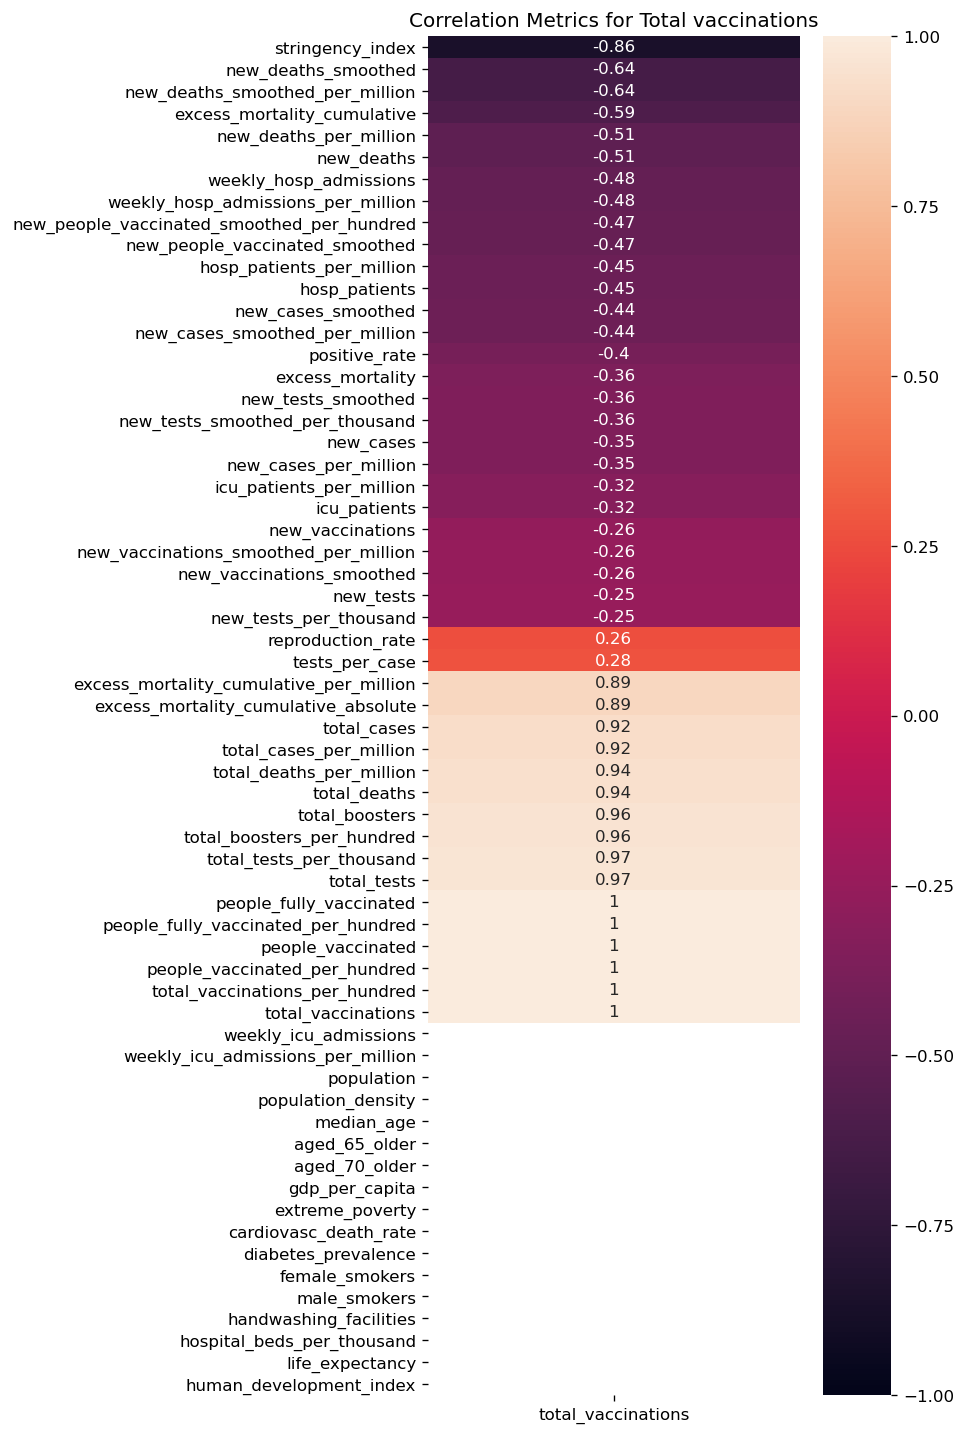

In [83]:
#correlation metrics
plt.figure(figsize=(5, 15))
heatmap = sns.heatmap(us_complete_data.corr()[['total_vaccinations']].sort_values('total_vaccinations'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Metrics for Total vaccinations');

From the above correlation plot between the total vaccinations and all the other metrics, we can observe some features are positively and negatively correlated to the total vaccinations.

**Features with Negative correlation to Total Vaccinations:**
1. Stringency index
2. New Deaths Smoothed
3. Hospitalized Patients
4. New Cases Smoothed
5. ICU Patients

**Features with Positive correlation to Total Vaccinations:**<br>
It's strange that why these features are correlated to the total vaccination. But there is the reason for this in the given period between the one year, we can observe that the deaths and cases started to increase and the to stop the spread of virus government has increased the vaccinations to the people to stop the spread and deaths. And now after the vaccinations, the Cases and Deaths are decreased as the people are vaccinated.
1. Total Deaths
2. Total Cases

**Let us plot the daily covid cases trend in United States**

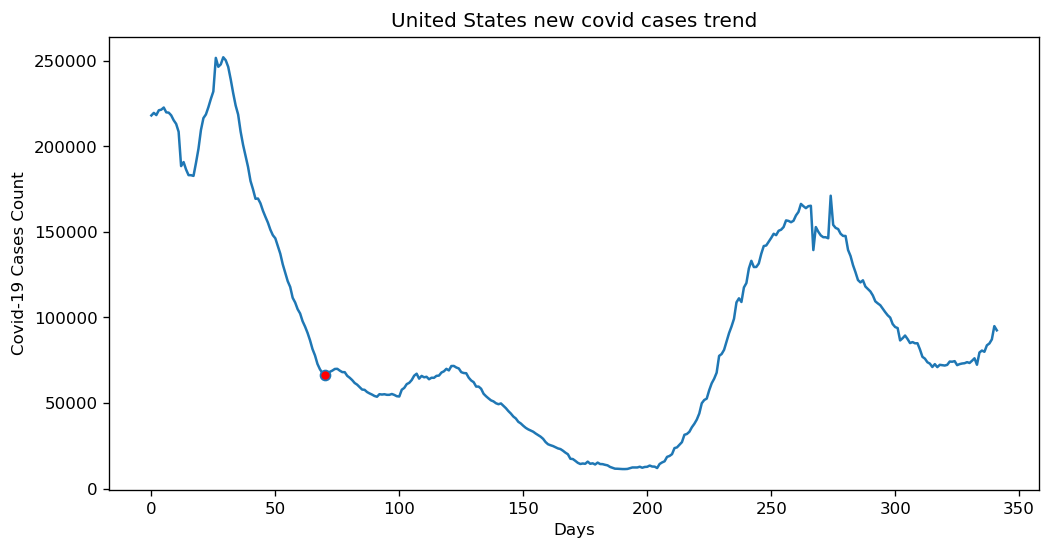

In [84]:
us_complete_data.new_cases_smoothed.plot(markevery=[70], marker='o', markerfacecolor='r')
plt.xlabel('Days')
plt.ylabel('Covid-19 Cases Count')
plt.title('United States new covid cases trend')
plt.show()

The above plot represents the daily covid case count, the United States has entered into the third wave during mid-October, 2020 and ended in late February 2021. The Red marker which you can see in the graph is the end of the third wave in the United States.

**Negative Correlation plots**

**Stringency index & Total Vaccinations**

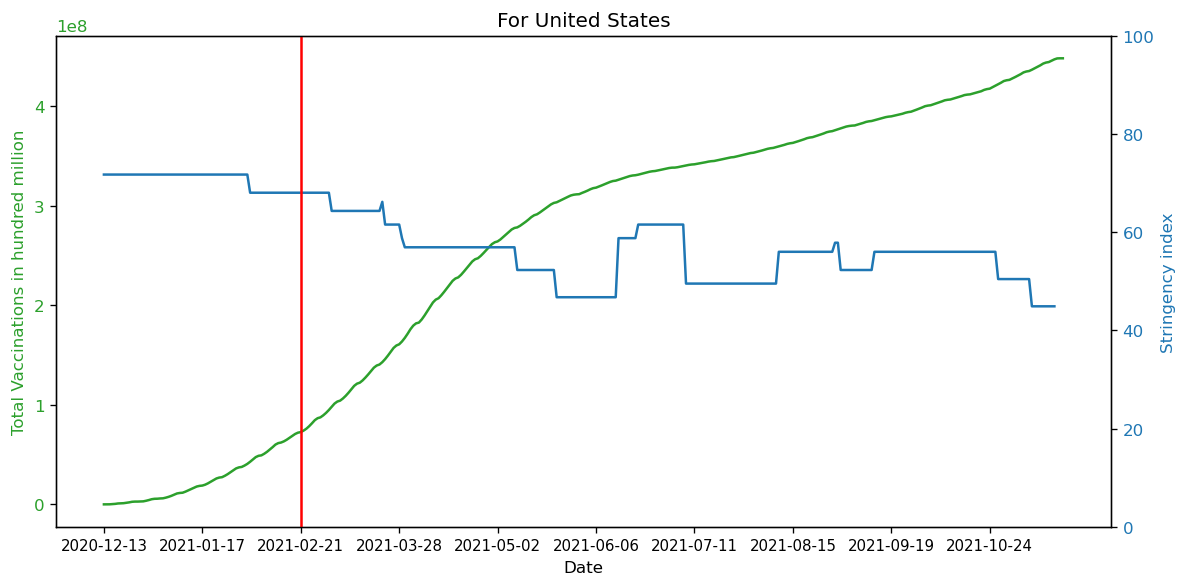

In [85]:
X = us_complete_data.date
data1 = us_complete_data.total_vaccinations
data2 = us_complete_data.stringency_index

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in hundred million', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Stringency index', color=color)  # we already handled the x-label with ax1
ax2.set_ylim(0,100)
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('For United States')
plt.axvline(x=us_complete_data.date[70], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

- The red line indicates the end of the third wave in the United States.
- The green curve gives the total vaccination data in the United States and the blue line indicates the Stringency index.
- Relationship between the total vaccinations and stringency index, as the total vaccinations increased the stringency index has been reduced. The government has reduced the lockdown protocols as the vaccination count has increased.

**Relationship of Total Vaccinations with ICU Patients and New Deaths**

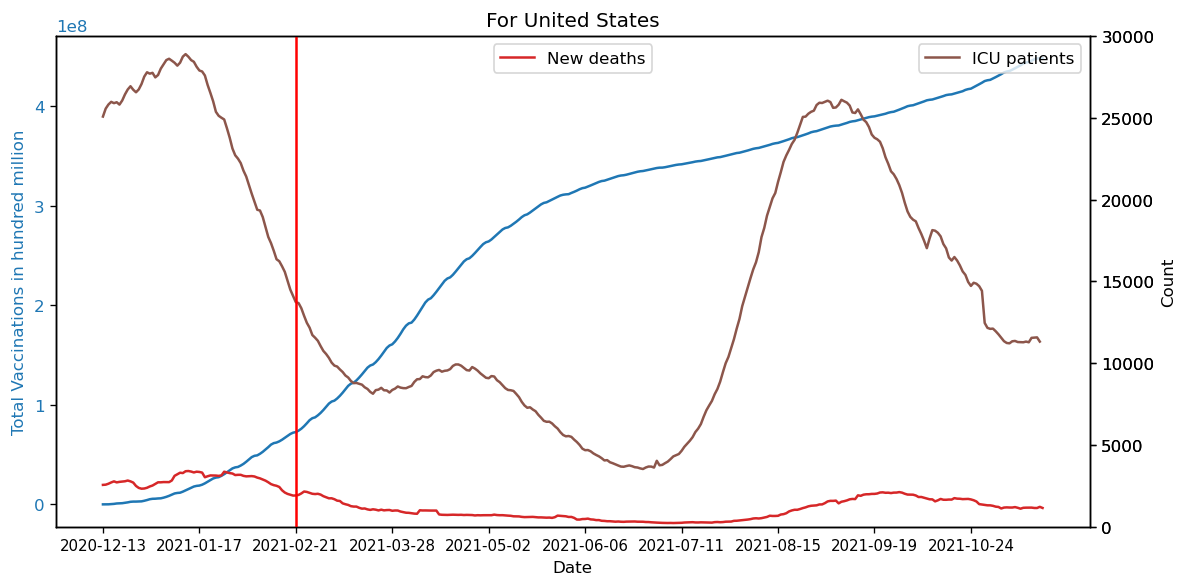

In [86]:
X = us_complete_data.date
data1 = us_complete_data.total_vaccinations
data2 = us_complete_data.new_deaths_smoothed
data3 = us_complete_data.icu_patients

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in hundred million', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Count')
ax2.plot(X, data2, color=color, label='New deaths')
ax2.set_ylim(0, 30000)
ax2.legend(loc='upper center')

color = 'tab:brown'
ax3.plot(X, data3, color=color, label='ICU patients')
ax3.set_ylim(0, 30000)
ax3.legend(loc='upper right')

#plt.legend({'New Deaths','ICU patitents'})
plt.title('For United States')
plt.axvline(x=us_complete_data.date[70], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

 - The Redline represents the end of the third wave in the United States.
 - Looking at the ICU patients and New deaths curve, it's evident that the United States has entered into the fourth wave and it's ended too.
 - The total vaccination count has increased exponentially from the third wave to the fourth wave it has been increased from 21,634(min) to 440 million(max).

**Relationship of Total Vaccinations with Hospitalized Patients and New Covid Cases**

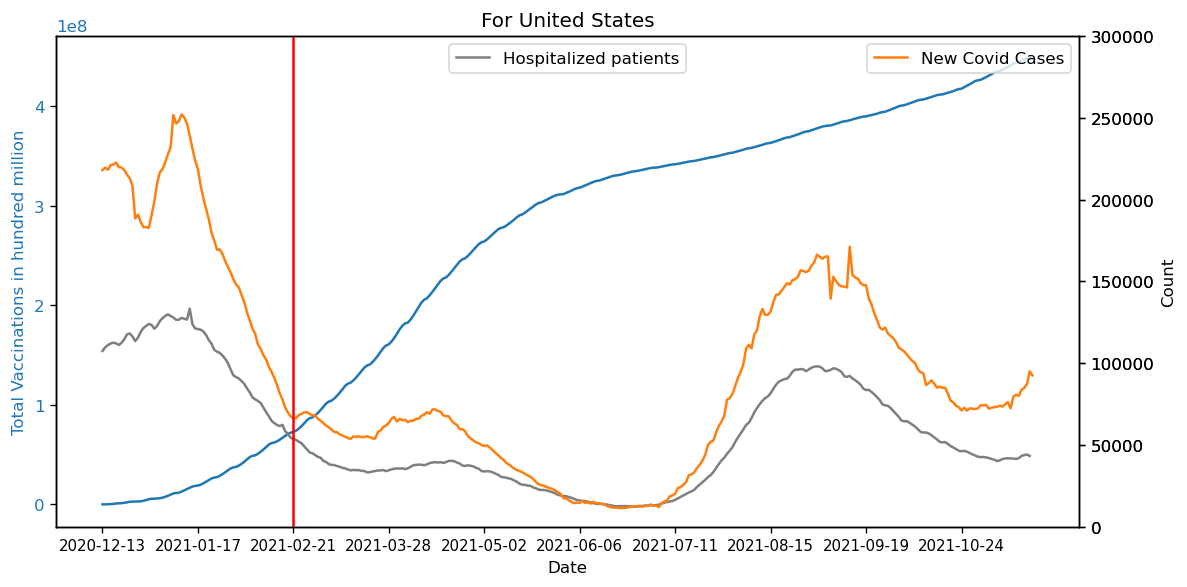

In [87]:
X = us_complete_data.date
data1 = us_complete_data.total_vaccinations
data2 = us_complete_data.hosp_patients
data3 = us_complete_data.new_cases_smoothed

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in hundred million', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()

color = 'tab:grey'
ax2.set_ylabel('Count')
ax2.plot(X, data2, color=color, label='Hospitalized patients')
ax2.set_ylim(0, 300000)
ax2.legend(loc='upper center')

color = 'tab:orange'
ax3.plot(X, data3, color=color, label='New Covid Cases')
ax3.set_ylim(0, 300000)
ax3.legend(loc='upper right')

#plt.legend({'New Deaths','ICU patitents'})
plt.title('For United States')
plt.axvline(x=us_complete_data.date[70], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

- It's surprising the new Covid cases curve and Hospitalized patients curve are almost parallel throughout the data. This might be the reason in United states government has increased the total vaccinations exponentially.
- We can observe the fourth wave clearly from the mid-July to October end.


**Positive Correlation plots**

**Total Vaccination & Total Deaths**

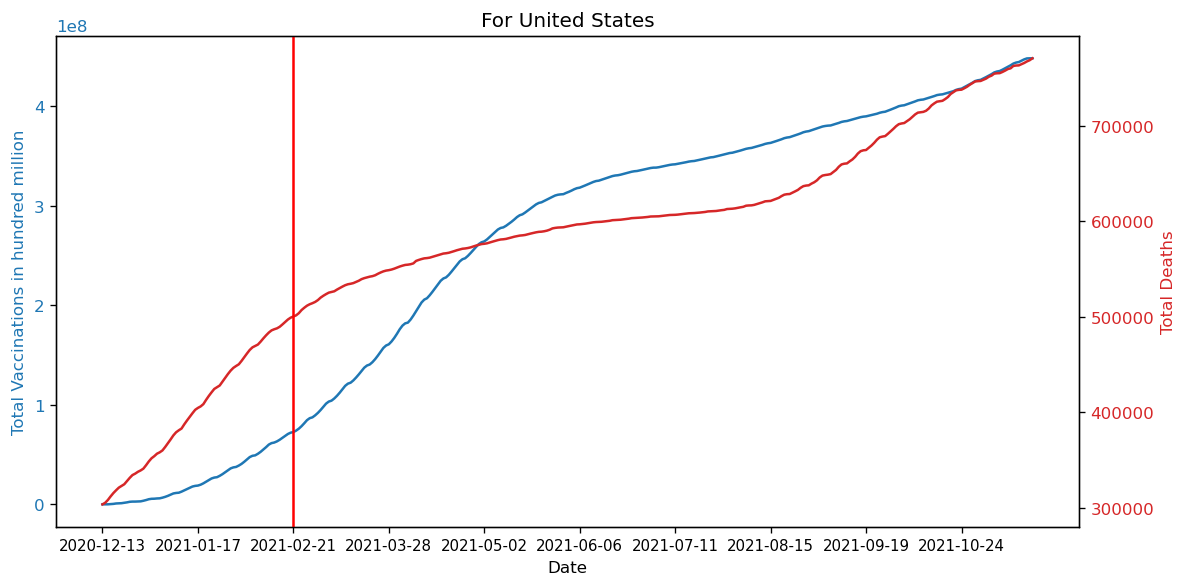

In [88]:
X = us_complete_data.date
data1 = us_complete_data.total_vaccinations
data2 = us_complete_data.total_deaths

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in hundred million', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Total Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('For United States')
plt.axvline(x=us_complete_data.date[70], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

From the above plot, we can observe the relation between vaccinations and deaths due to covid. We can observe the total deaths curve has increased exponentially till Feb end from then till mid-august the wasn't many deaths as compared to before. But after mid-August, the deaths started to increase again exponentially. As the vaccination program in the United States might have been delayed by people, this caused the heavy death toll.

**Total Vaccinations & Total Covid Cases**

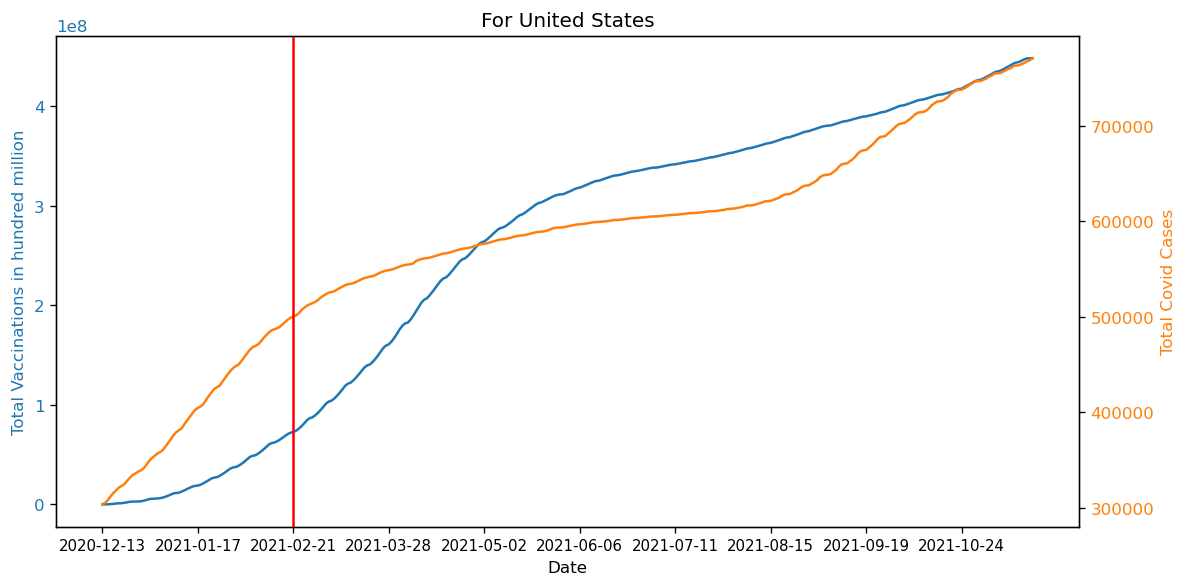

In [89]:
X = us_complete_data.date
data1 = us_complete_data.total_vaccinations
data2 = us_complete_data.total_deaths

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in hundred million', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Total Covid Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('For United States')
plt.axvline(x=us_complete_data.date[70], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The total covid cases plot also follows a similar pattern as the total covid deaths plot. In general, we can observe that the United States might have delayed its vaccination program or this might be also due to the high population in the United States.

**Model to Predict the Covid-19 death count:**<br>
I am selecting the LinearRegression model to predict the death count with the given inputs, as it is the best model to solve the regression problem.<br>

Here, I am selecting total vaccination count as input for the linear regression model and predicting the total death count in the given period of time.<br>

In [90]:
#creating common function to use it for Canada and United states data.
def model(data,title):
    
  X = data[['total_vaccinations']]
  y = data.total_deaths

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1624)

  linreg = LinearRegression()
  linreg.fit(X_train, y_train)

  y_predict = linreg.predict(X_test)


  # The coefficients
  print("Coefficients: \n", linreg.coef_)
  # The mean squared error
  print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))
  # The coefficient of determination: 1 is perfect prediction
  print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

  plt.figure(figsize=(5,5))
  sns.regplot(x=y_test,y=y_predict, color='red')
  plt.xlim(0,y.max())
  plt.ylim(0,y.max())
  plt.xticks(rotation=45)
  plt.title(title)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()

**Prediction of New Covid-19 Death count for Canada**

Coefficients: 
 [0.00014326]
Mean squared error: 3677174.81
Coefficient of determination: 0.77


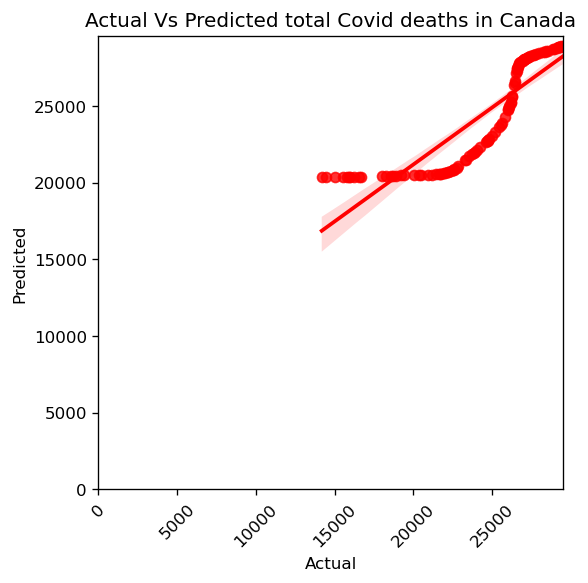

In [91]:
model(canada_complete_data.fillna(0),'Actual Vs Predicted total Covid deaths in Canada')

**Prediction of New Covid-19 Death count for United States**

Coefficients: 
 [0.00071621]
Mean squared error: 1259004982.66
Coefficient of determination: 0.90


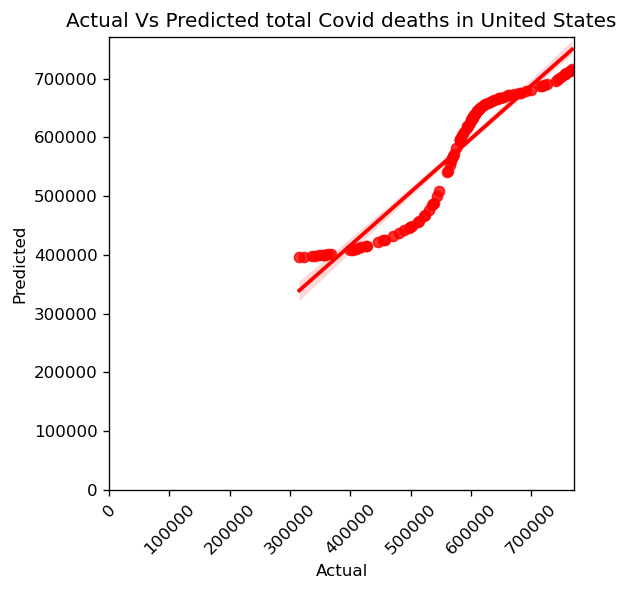

In [92]:
model(us_complete_data.fillna(0),'Actual Vs Predicted total Covid deaths in United States')

The Performance of the linear regression model is pretty good the performance of the model is 77 and 90 percentage on Canada and United States data. On a given day we could predict the no of deaths due to covid on the given day by passing the total Vaccination count.<br>

For the model building, I am using the Train set to train the model and test set to test the model. So, for splitting the data I am using a test-train split which takes the random data points from the given data. The Trend which I was able to see in the graphs is as the Total vaccinations count increases exponentially, the total deaths count started to increase slightly or no increase in the future. So, the model was able to predict the total death count in future with the given count of total vaccinations.

# 5. Deriving insights about the effect of vaccination and discussion

**Stringency index**<br>

Here I am comparing the daily lives of people concerning the stringency index. The Stringency index is the measure of rules and protocols to people set by the government to stop the spread of Covid-19. The stringency index is a composite measure based on nine response indicators including school closures, workplace closures, and travel bans rescaled to a value from 0 to 100 (100 = strictest).<br>

A high Stringency index means a lot of rules and restrictions imposed on the general public. Some of this include:<br>
- Lockdown
- Travel restrictions
- Gathering limit
- Mandatory Masks
- Work from Home, online classes

**Effect of vaccination on our daily lives in Canada**

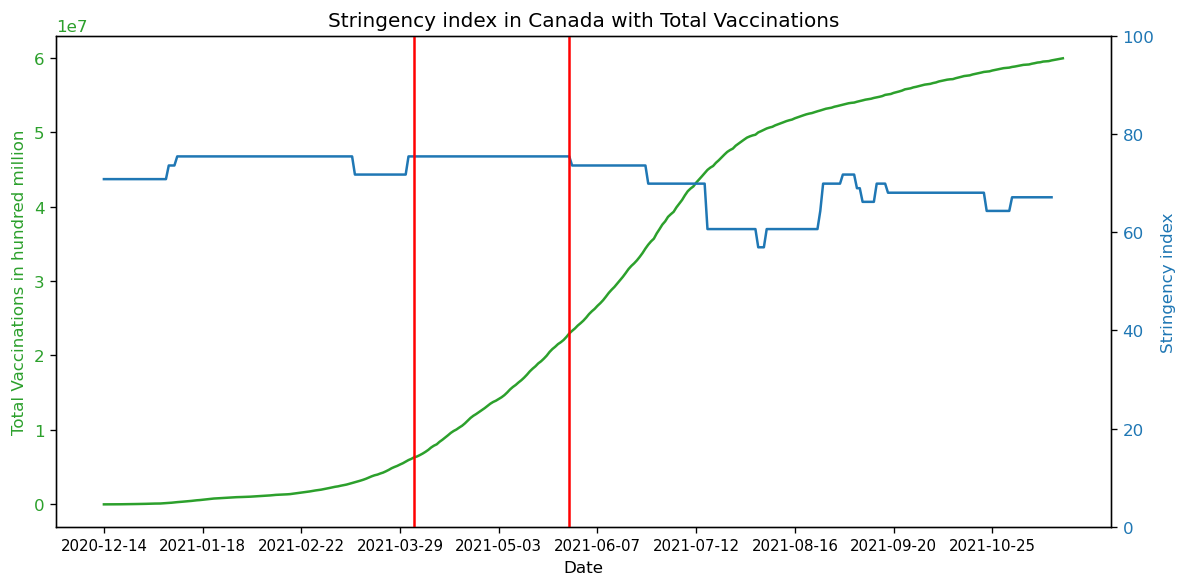

In [93]:
X = canada_complete_data.date
data1 = canada_complete_data.total_vaccinations
data2 = canada_complete_data.stringency_index

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in hundred million', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Stringency index', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)

plt.title('Stringency index in Canada with Total Vaccinations')
plt.axvline(x=canada_complete_data.date[110], color='red')
plt.axvline(x=canada_complete_data.date[165], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

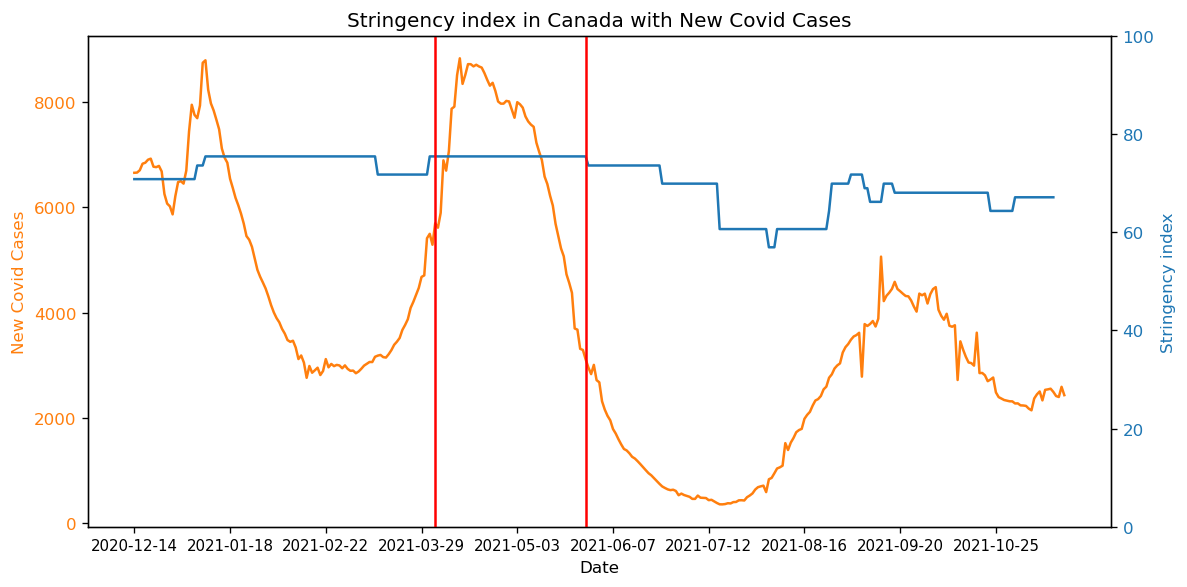

In [94]:
X = canada_complete_data.date
data1 = canada_complete_data.new_cases_smoothed
data2 = canada_complete_data.stringency_index

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('New Covid Cases', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Stringency index', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)

plt.title('Stringency index in Canada with New Covid Cases')
plt.axvline(x=canada_complete_data.date[110], color='red')
plt.axvline(x=canada_complete_data.date[165], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The Effects of vaccinations on people's life in Canada isn't much, the government has been following similar kind of protocols for the past year. The Government has tried to reduce the stringency index, in mid-July but they increased again with the increase in the daily covid cases count. The Vaccinations has increased exponentially but the stringency index in Canada remained the same to stop the spread of new cases and deaths due to covid.

**Effect of vaccination on our daily lives in United States**

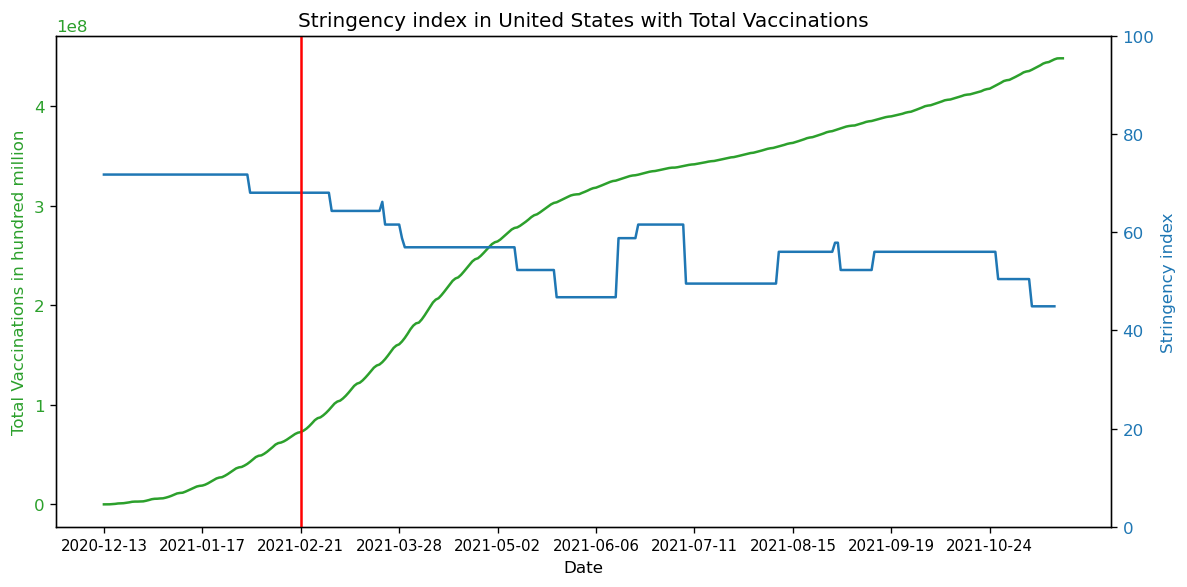

In [95]:
X = us_complete_data.date
data1 = us_complete_data.total_vaccinations
data2 = us_complete_data.stringency_index

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in hundred million', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Stringency index', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)

plt.title('Stringency index in United States with Total Vaccinations')
plt.axvline(x=us_complete_data.date[70], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

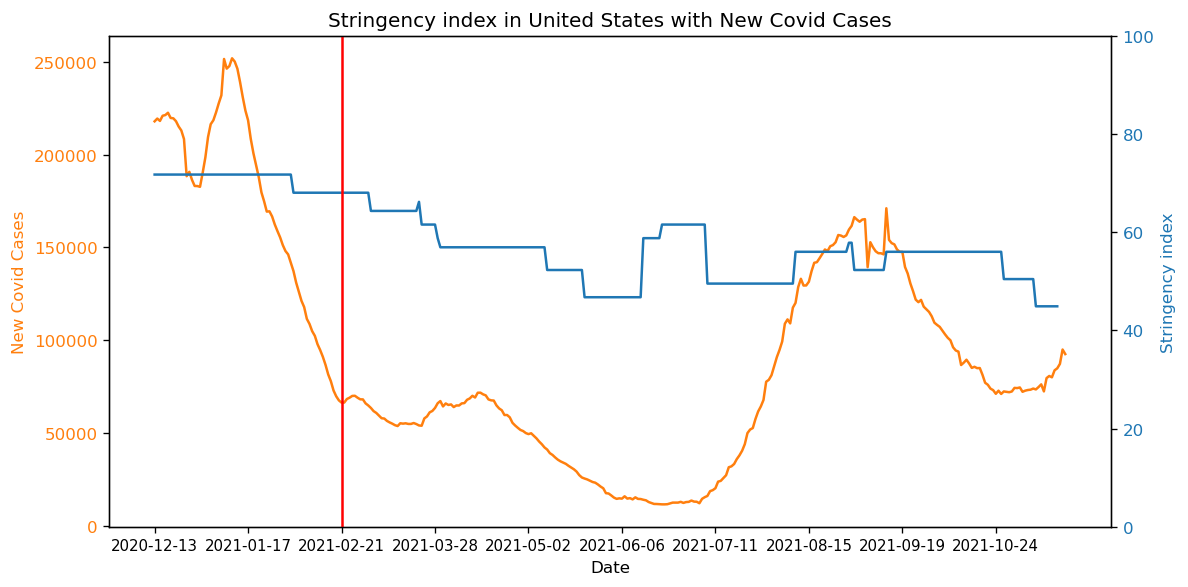

In [96]:
X = us_complete_data.date
data1 = us_complete_data.new_cases_smoothed
data2 = us_complete_data.stringency_index

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('New Covid Cases', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Stringency index', color=color)  # we already handled the x-label with ax1
ax2.plot(X, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)

plt.title('Stringency index in United States with New Covid Cases')
plt.axvline(x=us_complete_data.date[70], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In the United States, the Stringency index has been decreased from 71 to 44 during this one year. We can observe that the United States has changed its Covid rules a lot, but we can observe that during the fourth wave they had increased the covid rule with the increase in the covid cases. We can observe that with the increase in the total vaccinations the Stringency index has been decreased.

**Which of your chosen countries has the most effective vaccination program?**<br>

The Most effective vaccination program can be measured concerning the daily vaccination rate in the country.

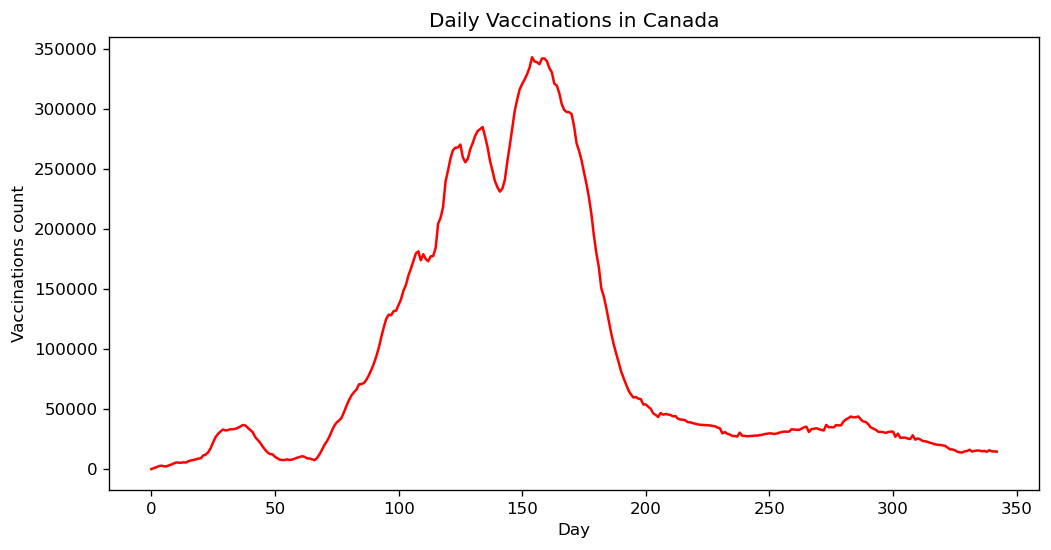

In [97]:
canada_vaccine_data.daily_people_vaccinated.plot(color='red')
plt.xlabel('Day')
plt.ylabel('Vaccinations count')
plt.title('Daily Vaccinations in Canada')
plt.show()

Canada population as of 2021 is 38,246,108 (38 Million). From the above graph, we can observe that the highest vaccinations count daily is 342,775(0.34 Million) its approximately 1 percent of the total population.

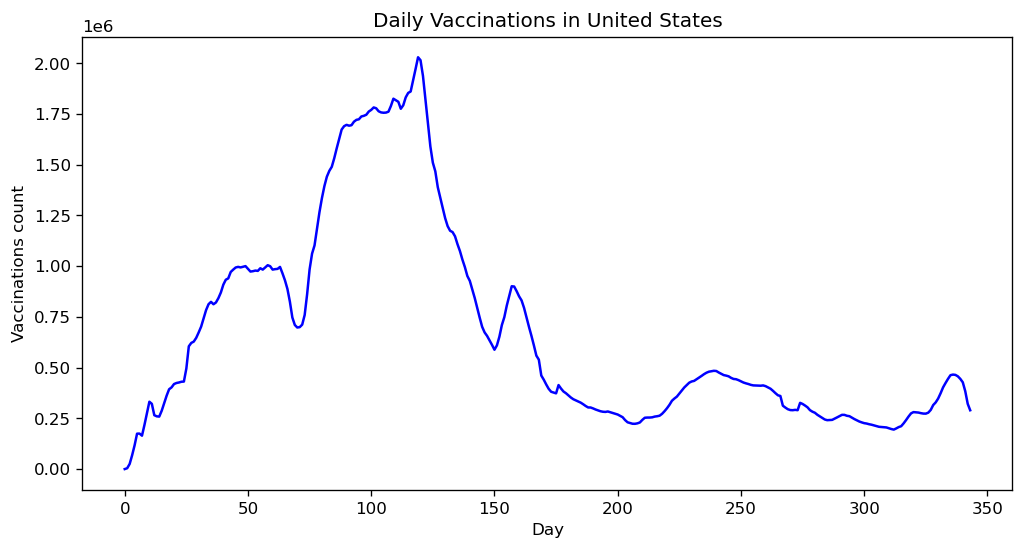

In [98]:
us_vaccine_data.daily_people_vaccinated.plot(color='blue')
plt.xlabel('Day')
plt.ylabel('Vaccinations count')
plt.title('Daily Vaccinations in United States')
plt.show()

United States population as of 2021 is 333,786,570 (333 Million). From the above graph, we can observe that the highest vaccinations count daily is 2,029,430(2 Million) its approximately 0.6 percentage of the total population.<br>
By comparing the highest rate of the total percentage of the population who are vaccinated per day, we can say that Canada has the best Vaccination program compared between the United States and Canada.

**Insights  derived  about  the  disease from model(s)  and  data analysis.**

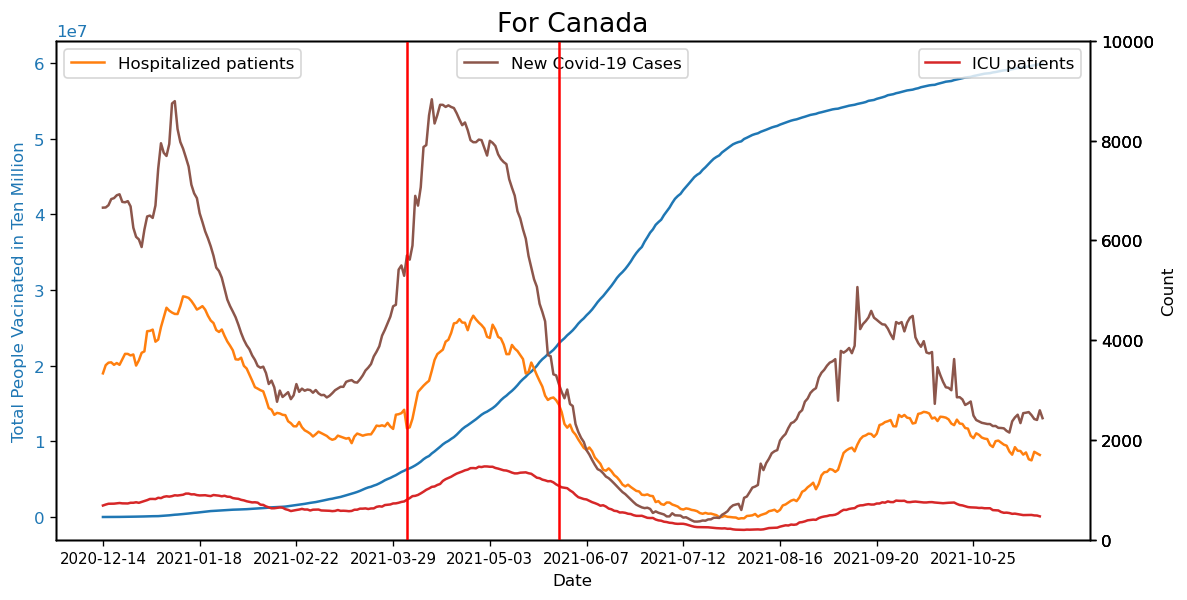

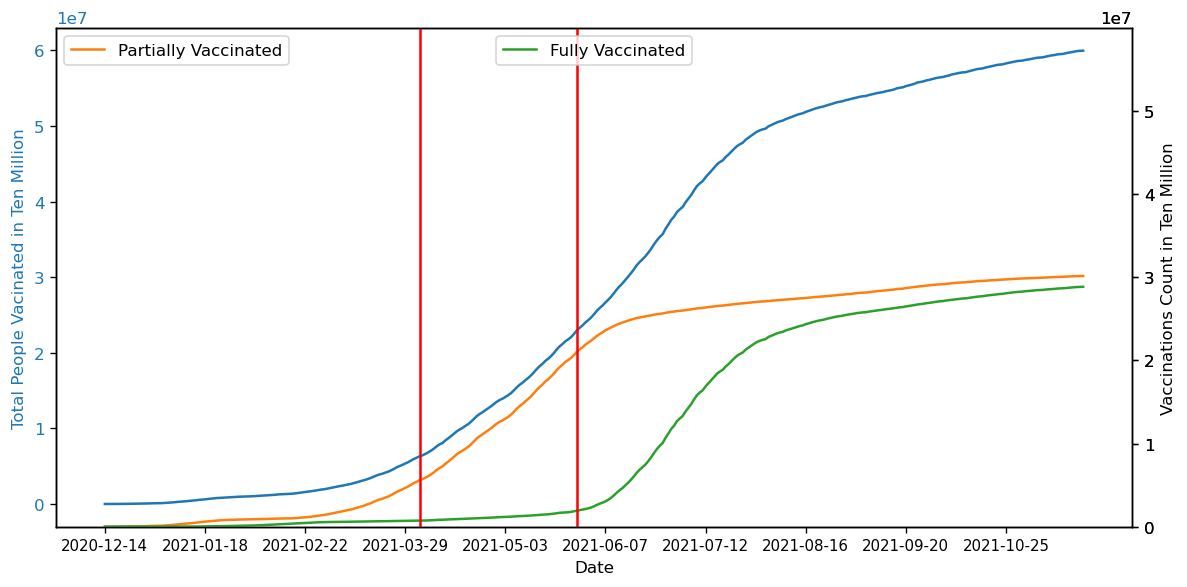

In [99]:
X = canada_complete_data.date
data1 = canada_complete_data.total_vaccinations
data2 = canada_complete_data.hosp_patients
data3 = canada_complete_data.new_cases_smoothed
data4 = canada_complete_data.icu_patients

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total People Vacinated in Ten Million', color=color)
ax1.plot(X, data1, color=color, label='Total Vaccinations')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()
ax4 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Count')
ax2.plot(X, data2, color=color, label='Hospitalized patients')
ax2.set_ylim(0, 10000)
ax2.legend(loc='upper left')

color = 'tab:brown'
ax3.plot(X, data3, color=color, label='New Covid-19 Cases')
ax3.set_ylim(0, 10000)
ax3.legend(loc='upper center')

color = 'tab:red'
ax4.plot(X, data4, color=color, label='ICU patients')
ax4.set_ylim(0, 10000)
ax4.legend(loc='upper right')

plt.axvline(x=canada_complete_data.date[110], color='red')
plt.axvline(x=canada_complete_data.date[165], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('For Canada', fontsize=16)
plt.show()

# Vaccinations plot
X = canada_vaccine_data.date
data1 = canada_vaccine_data.total_vaccinations
data2 = canada_vaccine_data.people_vaccinated
data3 = canada_vaccine_data.people_fully_vaccinated

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total People Vacinated in Ten Million', color=color)
ax1.plot(X, data1, color=color, label='Total Vaccinations')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Vaccinations Count in Ten Million')
ax2.plot(X, data2, color=color, label='Partially Vaccinated')
ax2.set_ylim(0, canada_vaccine_data.total_vaccinations.max())
ax2.legend(loc='upper left')

color = 'tab:green'
ax3.plot(X, data3, color=color, label='Fully Vaccinated')
ax3.set_ylim(0, canada_vaccine_data.total_vaccinations.max())
ax3.legend(loc='upper center')

plt.axvline(x=canada_complete_data.date[110], color='red')
plt.axvline(x=canada_complete_data.date[165], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**For Canada:**<br>
I had observed that Canada has a better Stringeny index that let to lower death toll, as we can see there was a maximum of 29,533 death in total compared with total population it's 0.07 percent of the total population are dead due to covid 19 in Canada during the given period. Canada also has a better Vaccination program and there is an exponential increase in the vaccinations in the given data over one year.<br>

From the above plot, we can observe that during the given period there are more people hospitalized than those who tested positive for the virus. This may be due to people who tested positive have admitted into hospital for safety reasons or people who tested positive were in serious conditions.<br>

**Third Wave:** In the given data, we can observe that Canada has entered and left the covid third wave the death toll was less than compared to other countries and we can see a rise of in cases from mid-August again but the impact on the public is less as people has been vaccinated.<br>

In Canada, the ratio between partially and fully vaccinated is almost similar. By from December 2020 to November 2021 78 percentage of the population are partially vaccinated and 75 percent of the population is fully vaccinated in Canada.<br>

Forecasting the total vaccinations in Canada after 50 days from the ARIMA time series model, in the best-case scenario, we can observe count of vaccination is 68 Million, in the base case scenario the count of vaccinations are 64 Million and in the worst-case scenario, the number of people vaccinated is 60 Million.

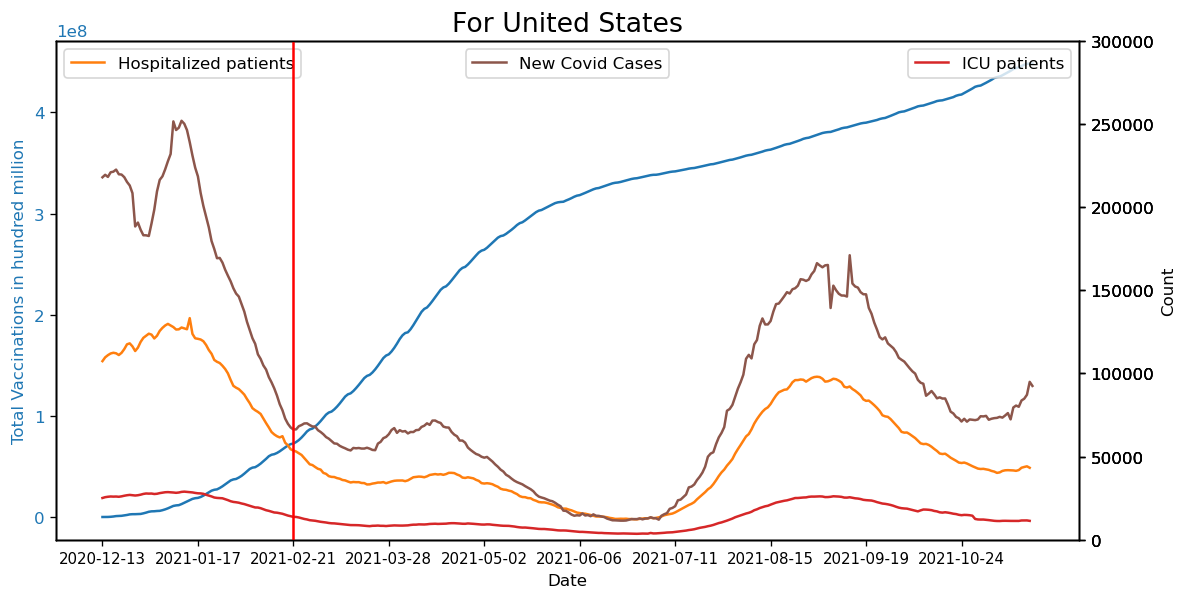

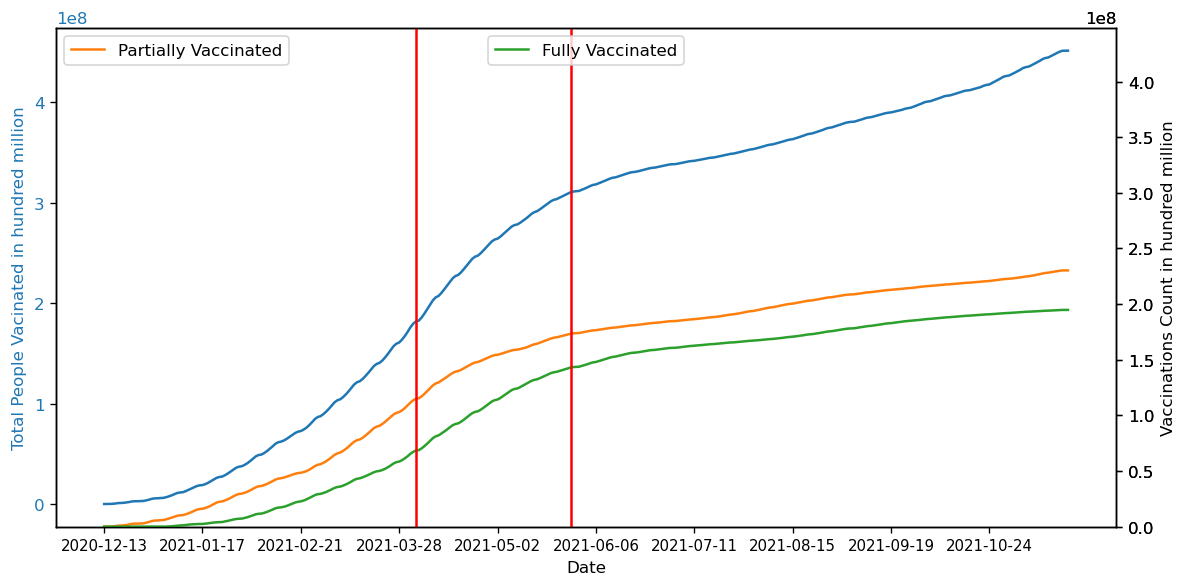

In [100]:
X = us_complete_data.date
data1 = us_complete_data.total_vaccinations
data2 = us_complete_data.hosp_patients
data3 = us_complete_data.new_cases_smoothed
data4 = us_complete_data.icu_patients

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total Vaccinations in hundred million', color=color)
ax1.plot(X, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()
ax4 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Count')
ax2.plot(X, data2, color=color, label='Hospitalized patients')
ax2.set_ylim(0, 300000)
ax2.legend(loc='upper left')

color = 'tab:brown'
ax3.plot(X, data3, color=color, label='New Covid Cases')
ax3.set_ylim(0, 300000)
ax3.legend(loc='upper center')


color = 'tab:red'
ax4.plot(X, data4, color=color, label='ICU patients')
ax4.set_ylim(0, 300000)
ax4.legend(loc='upper right')

#plt.legend({'New Deaths','ICU patitents'})
plt.axvline(x=us_complete_data.date[70], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('For United States', fontsize=16)
plt.show()

# Vaccinations plot
X = us_vaccine_data.date
data1 = us_vaccine_data.total_vaccinations
data2 = us_vaccine_data.people_vaccinated
data3 = us_vaccine_data.people_fully_vaccinated

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=9)
ax1.set_ylabel('Total People Vacinated in hundred million', color=color)
ax1.plot(X, data1, color=color, label='Total Vaccinations')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Vaccinations Count in hundred million')
ax2.plot(X, data2, color=color, label='Partially Vaccinated')
ax2.set_ylim(0, us_complete_data.total_vaccinations.max())
ax2.legend(loc='upper left')

color = 'tab:green'
ax3.plot(X, data3, color=color, label='Fully Vaccinated')
ax3.set_ylim(0, us_complete_data.total_vaccinations.max())
ax3.legend(loc='upper center')



plt.axvline(x=canada_complete_data.date[110], color='red')
plt.axvline(x=canada_complete_data.date[165], color='red')
plt.xticks(np.arange(0, len(X), step=35))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**For United States:**<br>
I have observed that for the United States the stringency index has kept on decreasing in the given data, this might be the reason for the early beginning of the third wave and fourth wave in the United States. The United States has entered into third covid wave earlier than Canada. The total number of deaths in the given period for the United States is 770,691, which is 0.23 percent of the total population are dead due to covid in given time intervals this is far worst than Canada covid death in a given interval.

From the above plot, we can observe that majority of people who got infected with covid have been hospitalized this can be observed in the Canada data as well.

We can also observe that the death toll is almost similar during the third wave and fourth wave, but there were more cases in the third wave compared to the fourth wave. The chances of death due to covid 19 is high during the fourth wave is high.

In the United States from December 2020 to November 2021, 69 percent of the population are partially vaccinated and 58 percent of the population is fully vaccinated in United States. When compared to the Canada Vaccinations statistics United states are performing less when compared.<br>

Forecasting the total vaccinations in the United States after 50 days from the ARIMA time series model, in the best-case scenario, we can observe count of vaccination is 575 Million, in the base case scenario the count of vaccinations are 544 Million and in the worst-case scenario, the number of people vaccinated is 513 Million.